# Company A - Neural Nets

**Goal:** Create a model that capture relationships between input and output of production  
**Scope:** focusing on all 13 inputs, but only 3 outputs (as given by the company)  
**Note:** This is a regression task because the target value is continuous (as opposed to discrete classes in classification).

* Multilayer Perceptron (Dense layers of neurons with various depths and widths)
* Ensemble (Bagging, Boosting) <span style="color:red"><< TODO </span>

## Import packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import sklearn

In [2]:
from tensorflow.keras.models import (Model, Sequential)
from tensorflow.keras.layers import (Input, Dense, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.optimizers import (Adam, SGD)
from tensorflow.keras.regularizers import l1

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Load data & key parameters

In [4]:
data = pd.read_pickle('mod_data.pkl')
print("Column headings:")
print(data.columns)

Column headings:
Index(['Product Made', 'Air consumption', 'Gas consumption', 'Exhaust gas',
       'Speed', 'Pressure', 'Kiln Feed', 'Dust Addition',
       'Moisture Beltweigher', 'Moisture CLC', 'Additive B', 'Additive C',
       'CLC CaO', 'CLC Na2O', 'Surface Area', 'Compacite', 'd50', 'd90',
       'B₂O₃', 'Na₂O'],
      dtype='object')


In [5]:
# key metrics
col_input = ["Air consumption","Gas consumption","Exhaust gas","Speed","Pressure","Kiln Feed","Dust Addition","Moisture Beltweigher","Moisture CLC","Additive B","Additive C","CLC CaO","CLC Na2O"]
col_output_H = ["Surface Area","Compacite","d50"]
col_output_L = ["d90","B₂O₃","Na₂O"]
prod_type = ['A','B','C','D','F','G','H','I']

## Multilayer Perceptron / Dense Neural Nets
**Training on three major metrics (Surface Area, Compacite, d50)**

##### Normalize data for NN

In [63]:
from sklearn import preprocessing

# removing Product A (="0") because there are too many, thus dominate results
data_in = data[col_input]
data_outH = data[col_output_H]

# Create a standard processor object
standard_scaler = preprocessing.StandardScaler()
# Create an object to transform the data to fit std processor
x_scaled = standard_scaler.fit_transform(data_in)
x_scaled2 = standard_scaler.fit_transform(data_outH)
# Run the normalizer on the dataframe
data_in_normalized = pd.DataFrame(x_scaled)
data_outH_normalized = pd.DataFrame(x_scaled2)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.1)

##### Inspect data shape 

In [65]:
print(" input layer:",data_in_normalized.shape)
print("output layer:",data_outH_normalized.shape)

 input layer: (1116, 13)
output layer: (1116, 3)


##### Setting up NN

In [105]:
l1_norm = 1e-4

model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(5):
    model.add(Dense(20, activation='relu', activity_regularizer=l1(l1_norm)))
model.add(Dense(3, activation='linear'))

##### Compile NN and fit

In [106]:
# set learning rate

lr = 1e-4
model.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=20, epochs=500,
          validation_data=(X_test, y_test))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 3ms/sample - loss: 1.0956 - accuracy: 0.4405 - val_loss: 0.7497 - val_accuracy: 0.4507
Epoch 2/500
781/781 [==============================] - 0s 179us/sample - loss: 1.0899 - accuracy: 0.4417 - val_loss: 0.7437 - val_accuracy: 0.4478
Epoch 3/500
781/781 [==============================] - 0s 246us/sample - loss: 1.0843 - accuracy: 0.4405 - val_loss: 0.7376 - val_accuracy: 0.4388
Epoch 4/500
781/781 [==============================] - 0s 378us/sample - loss: 1.0792 - accuracy: 0.4251 - val_loss: 0.7330 - val_accuracy: 0.4388
Epoch 5/500
781/781 [==============================] - 0s 400us/sample - loss: 1.0742 - accuracy: 0.4315 - val_loss: 0.7265 - val_accuracy: 0.4358
Epoch 6/500
781/781 [==============================] - 0s 486us/sample - loss: 1.0681 - accuracy: 0.4366 - val_loss: 0.7203 - val_accuracy: 0.4448
Epoch 7/500
781/781 [==============================] - 0s 516us/sample - l

781/781 [==============================] - 0s 316us/sample - loss: 0.7317 - accuracy: 0.5685 - val_loss: 0.4360 - val_accuracy: 0.5791
Epoch 112/500
781/781 [==============================] - 0s 351us/sample - loss: 0.7324 - accuracy: 0.5672 - val_loss: 0.4343 - val_accuracy: 0.5821
Epoch 113/500
781/781 [==============================] - 0s 353us/sample - loss: 0.7299 - accuracy: 0.5672 - val_loss: 0.4347 - val_accuracy: 0.5761
Epoch 114/500
781/781 [==============================] - 0s 350us/sample - loss: 0.7287 - accuracy: 0.5621 - val_loss: 0.4360 - val_accuracy: 0.5791
Epoch 115/500
781/781 [==============================] - 0s 331us/sample - loss: 0.7285 - accuracy: 0.5672 - val_loss: 0.4353 - val_accuracy: 0.5791
Epoch 116/500
781/781 [==============================] - 0s 321us/sample - loss: 0.7267 - accuracy: 0.5711 - val_loss: 0.4346 - val_accuracy: 0.5821
Epoch 117/500
781/781 [==============================] - 0s 272us/sample - loss: 0.7265 - accuracy: 0.5647 - val_loss: 0

781/781 [==============================] - 0s 330us/sample - loss: 0.6791 - accuracy: 0.5877 - val_loss: 0.4441 - val_accuracy: 0.5881
Epoch 167/500
781/781 [==============================] - 0s 298us/sample - loss: 0.6780 - accuracy: 0.5903 - val_loss: 0.4426 - val_accuracy: 0.5672
Epoch 168/500
781/781 [==============================] - 0s 309us/sample - loss: 0.6771 - accuracy: 0.5851 - val_loss: 0.4437 - val_accuracy: 0.5701
Epoch 169/500
781/781 [==============================] - 0s 321us/sample - loss: 0.6770 - accuracy: 0.5928 - val_loss: 0.4421 - val_accuracy: 0.5701
Epoch 170/500
781/781 [==============================] - 0s 317us/sample - loss: 0.6757 - accuracy: 0.5864 - val_loss: 0.4433 - val_accuracy: 0.5731
Epoch 171/500
781/781 [==============================] - 0s 323us/sample - loss: 0.6737 - accuracy: 0.5928 - val_loss: 0.4429 - val_accuracy: 0.5791
Epoch 172/500
781/781 [==============================] - 0s 356us/sample - loss: 0.6735 - accuracy: 0.5839 - val_loss: 0

781/781 [==============================] - 0s 376us/sample - loss: 0.6296 - accuracy: 0.6108 - val_loss: 0.4543 - val_accuracy: 0.5851
Epoch 222/500
781/781 [==============================] - 0s 383us/sample - loss: 0.6266 - accuracy: 0.6044 - val_loss: 0.4573 - val_accuracy: 0.5672
Epoch 223/500
781/781 [==============================] - 0s 390us/sample - loss: 0.6271 - accuracy: 0.6133 - val_loss: 0.4550 - val_accuracy: 0.5851
Epoch 224/500
781/781 [==============================] - 0s 357us/sample - loss: 0.6303 - accuracy: 0.6108 - val_loss: 0.4529 - val_accuracy: 0.5672
Epoch 225/500
781/781 [==============================] - 0s 240us/sample - loss: 0.6279 - accuracy: 0.6120 - val_loss: 0.4546 - val_accuracy: 0.5701
Epoch 226/500
781/781 [==============================] - 0s 313us/sample - loss: 0.6238 - accuracy: 0.6056 - val_loss: 0.4566 - val_accuracy: 0.5731
Epoch 227/500
781/781 [==============================] - 0s 226us/sample - loss: 0.6230 - accuracy: 0.6095 - val_loss: 0

781/781 [==============================] - 0s 390us/sample - loss: 0.5775 - accuracy: 0.6184 - val_loss: 0.4753 - val_accuracy: 0.5761
Epoch 277/500
781/781 [==============================] - 0s 427us/sample - loss: 0.5766 - accuracy: 0.6172 - val_loss: 0.4756 - val_accuracy: 0.5791
Epoch 278/500
781/781 [==============================] - 0s 469us/sample - loss: 0.5772 - accuracy: 0.6184 - val_loss: 0.4770 - val_accuracy: 0.5791
Epoch 279/500
781/781 [==============================] - 0s 445us/sample - loss: 0.5749 - accuracy: 0.6210 - val_loss: 0.4774 - val_accuracy: 0.5761
Epoch 280/500
781/781 [==============================] - 0s 453us/sample - loss: 0.5736 - accuracy: 0.6197 - val_loss: 0.4794 - val_accuracy: 0.5731
Epoch 281/500
781/781 [==============================] - 0s 462us/sample - loss: 0.5737 - accuracy: 0.6210 - val_loss: 0.4796 - val_accuracy: 0.5731
Epoch 282/500
781/781 [==============================] - 0s 422us/sample - loss: 0.5718 - accuracy: 0.6236 - val_loss: 0

781/781 [==============================] - 0s 440us/sample - loss: 0.5246 - accuracy: 0.6236 - val_loss: 0.4961 - val_accuracy: 0.5851
Epoch 332/500
781/781 [==============================] - 0s 440us/sample - loss: 0.5277 - accuracy: 0.6031 - val_loss: 0.4994 - val_accuracy: 0.5910
Epoch 333/500
781/781 [==============================] - 0s 415us/sample - loss: 0.5227 - accuracy: 0.6108 - val_loss: 0.4950 - val_accuracy: 0.5701
Epoch 334/500
781/781 [==============================] - 0s 449us/sample - loss: 0.5238 - accuracy: 0.6133 - val_loss: 0.4974 - val_accuracy: 0.5701
Epoch 335/500
781/781 [==============================] - 0s 436us/sample - loss: 0.5214 - accuracy: 0.6133 - val_loss: 0.4971 - val_accuracy: 0.5672
Epoch 336/500
781/781 [==============================] - 0s 432us/sample - loss: 0.5213 - accuracy: 0.6248 - val_loss: 0.4959 - val_accuracy: 0.5761
Epoch 337/500
781/781 [==============================] - 0s 435us/sample - loss: 0.5211 - accuracy: 0.6223 - val_loss: 0

781/781 [==============================] - 0s 434us/sample - loss: 0.4732 - accuracy: 0.6338 - val_loss: 0.5149 - val_accuracy: 0.5701
Epoch 387/500
781/781 [==============================] - 0s 425us/sample - loss: 0.4693 - accuracy: 0.6300 - val_loss: 0.5130 - val_accuracy: 0.5761
Epoch 388/500
781/781 [==============================] - 0s 448us/sample - loss: 0.4702 - accuracy: 0.6325 - val_loss: 0.5153 - val_accuracy: 0.5761
Epoch 389/500
781/781 [==============================] - 0s 444us/sample - loss: 0.4697 - accuracy: 0.6300 - val_loss: 0.5136 - val_accuracy: 0.5821
Epoch 390/500
781/781 [==============================] - 0s 438us/sample - loss: 0.4679 - accuracy: 0.6312 - val_loss: 0.5151 - val_accuracy: 0.5731
Epoch 391/500
781/781 [==============================] - 0s 443us/sample - loss: 0.4667 - accuracy: 0.6274 - val_loss: 0.5153 - val_accuracy: 0.5731
Epoch 392/500
781/781 [==============================] - 0s 425us/sample - loss: 0.4703 - accuracy: 0.6376 - val_loss: 0

781/781 [==============================] - 0s 440us/sample - loss: 0.4106 - accuracy: 0.6197 - val_loss: 0.5268 - val_accuracy: 0.5672
Epoch 442/500
781/781 [==============================] - 0s 420us/sample - loss: 0.4115 - accuracy: 0.6210 - val_loss: 0.5270 - val_accuracy: 0.5701
Epoch 443/500
781/781 [==============================] - 0s 420us/sample - loss: 0.4076 - accuracy: 0.6184 - val_loss: 0.5269 - val_accuracy: 0.5672
Epoch 444/500
781/781 [==============================] - 0s 440us/sample - loss: 0.4096 - accuracy: 0.6300 - val_loss: 0.5297 - val_accuracy: 0.5672
Epoch 445/500
781/781 [==============================] - 0s 418us/sample - loss: 0.4065 - accuracy: 0.6300 - val_loss: 0.5287 - val_accuracy: 0.5672
Epoch 446/500
781/781 [==============================] - 0s 427us/sample - loss: 0.4051 - accuracy: 0.6223 - val_loss: 0.5272 - val_accuracy: 0.5701
Epoch 447/500
781/781 [==============================] - 0s 433us/sample - loss: 0.4037 - accuracy: 0.6197 - val_loss: 0

781/781 [==============================] - 0s 229us/sample - loss: 0.3416 - accuracy: 0.6376 - val_loss: 0.5477 - val_accuracy: 0.5612
Epoch 497/500
781/781 [==============================] - 0s 347us/sample - loss: 0.3394 - accuracy: 0.6338 - val_loss: 0.5480 - val_accuracy: 0.5522
Epoch 498/500
781/781 [==============================] - 0s 435us/sample - loss: 0.3380 - accuracy: 0.6376 - val_loss: 0.5442 - val_accuracy: 0.5522
Epoch 499/500
781/781 [==============================] - 0s 425us/sample - loss: 0.3368 - accuracy: 0.6351 - val_loss: 0.5502 - val_accuracy: 0.5493
Epoch 500/500
781/781 [==============================] - 0s 443us/sample - loss: 0.3371 - accuracy: 0.6389 - val_loss: 0.5447 - val_accuracy: 0.5493


##### Evaluate model

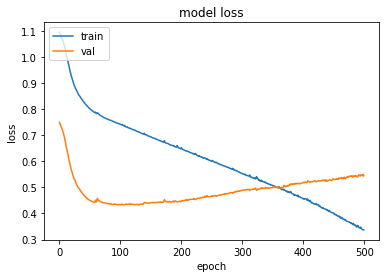

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

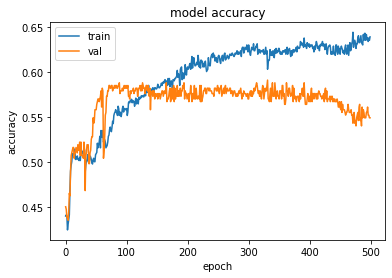

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
# Prediction
predict_raw = model.predict(X_test, verbose=0)
predict_raw.shape

(369, 3)

### <span style="color:red"> ** Using deeper and wider net </span>

In [87]:
l1_norm = 1e-4

model2 = Sequential()
model2.add(Dense(50, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(10):
    model2.add(Dense(50, activation='relu', activity_regularizer=l1(l1_norm)))
model2.add(Dense(3, activation='linear'))

In [93]:
# set learning rate

lr = 1e-4
model2.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
                      batch_size=100, epochs=500,
                      validation_data=(X_test, y_test))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 3ms/sample - loss: 1.1073 - accuracy: 0.4405 - val_loss: 0.7599 - val_accuracy: 0.4179
Epoch 2/500
781/781 [==============================] - 0s 88us/sample - loss: 1.1063 - accuracy: 0.4302 - val_loss: 0.7591 - val_accuracy: 0.4119
Epoch 3/500
781/781 [==============================] - 0s 78us/sample - loss: 1.1052 - accuracy: 0.4149 - val_loss: 0.7583 - val_accuracy: 0.3910
Epoch 4/500
781/781 [==============================] - 0s 79us/sample - loss: 1.1040 - accuracy: 0.3841 - val_loss: 0.7571 - val_accuracy: 0.3701
Epoch 5/500
781/781 [==============================] - 0s 89us/sample - loss: 1.1023 - accuracy: 0.3892 - val_loss: 0.7554 - val_accuracy: 0.3642
Epoch 6/500
781/781 [==============================] - 0s 94us/sample - loss: 1.1001 - accuracy: 0.3969 - val_loss: 0.7528 - val_accuracy: 0.3881
Epoch 7/500
781/781 [==============================] - 0s 104us/sample - loss: 

781/781 [==============================] - 0s 99us/sample - loss: 0.5594 - accuracy: 0.5992 - val_loss: 0.5396 - val_accuracy: 0.5164
Epoch 112/500
781/781 [==============================] - 0s 100us/sample - loss: 0.5571 - accuracy: 0.5928 - val_loss: 0.5369 - val_accuracy: 0.5134
Epoch 113/500
781/781 [==============================] - 0s 93us/sample - loss: 0.5575 - accuracy: 0.6005 - val_loss: 0.5422 - val_accuracy: 0.5194
Epoch 114/500
781/781 [==============================] - 0s 177us/sample - loss: 0.5514 - accuracy: 0.6069 - val_loss: 0.5451 - val_accuracy: 0.5194
Epoch 115/500
781/781 [==============================] - 0s 184us/sample - loss: 0.5520 - accuracy: 0.5980 - val_loss: 0.5521 - val_accuracy: 0.5134
Epoch 116/500
781/781 [==============================] - 0s 185us/sample - loss: 0.5452 - accuracy: 0.6108 - val_loss: 0.5418 - val_accuracy: 0.5164
Epoch 117/500
781/781 [==============================] - 0s 151us/sample - loss: 0.5420 - accuracy: 0.6069 - val_loss: 0.5

781/781 [==============================] - 0s 175us/sample - loss: 0.1593 - accuracy: 0.6120 - val_loss: 0.7733 - val_accuracy: 0.5821
Epoch 222/500
781/781 [==============================] - 0s 185us/sample - loss: 0.1683 - accuracy: 0.6172 - val_loss: 0.7862 - val_accuracy: 0.5851
Epoch 223/500
781/781 [==============================] - 0s 119us/sample - loss: 0.1655 - accuracy: 0.6159 - val_loss: 0.7828 - val_accuracy: 0.5881
Epoch 224/500
781/781 [==============================] - 0s 99us/sample - loss: 0.1606 - accuracy: 0.6223 - val_loss: 0.7861 - val_accuracy: 0.5672
Epoch 225/500
781/781 [==============================] - 0s 105us/sample - loss: 0.1623 - accuracy: 0.6172 - val_loss: 0.7983 - val_accuracy: 0.5791
Epoch 226/500
781/781 [==============================] - 0s 110us/sample - loss: 0.1518 - accuracy: 0.6223 - val_loss: 0.7950 - val_accuracy: 0.5821
Epoch 227/500
781/781 [==============================] - 0s 95us/sample - loss: 0.1503 - accuracy: 0.6172 - val_loss: 0.7

781/781 [==============================] - 0s 115us/sample - loss: 0.0714 - accuracy: 0.6825 - val_loss: 0.7584 - val_accuracy: 0.5642
Epoch 332/500
781/781 [==============================] - 0s 123us/sample - loss: 0.0740 - accuracy: 0.6940 - val_loss: 0.7574 - val_accuracy: 0.5582
Epoch 333/500
781/781 [==============================] - 0s 112us/sample - loss: 0.0763 - accuracy: 0.6863 - val_loss: 0.7364 - val_accuracy: 0.5552
Epoch 334/500
781/781 [==============================] - 0s 122us/sample - loss: 0.0752 - accuracy: 0.6863 - val_loss: 0.7499 - val_accuracy: 0.5761
Epoch 335/500
781/781 [==============================] - 0s 126us/sample - loss: 0.0785 - accuracy: 0.6876 - val_loss: 0.7460 - val_accuracy: 0.5612
Epoch 336/500
781/781 [==============================] - 0s 114us/sample - loss: 0.0735 - accuracy: 0.6863 - val_loss: 0.7527 - val_accuracy: 0.5672
Epoch 337/500
781/781 [==============================] - 0s 114us/sample - loss: 0.0769 - accuracy: 0.6876 - val_loss: 0

781/781 [==============================] - 0s 100us/sample - loss: 0.0534 - accuracy: 0.7273 - val_loss: 0.7406 - val_accuracy: 0.5940
Epoch 442/500
781/781 [==============================] - 0s 104us/sample - loss: 0.0537 - accuracy: 0.7324 - val_loss: 0.7264 - val_accuracy: 0.5881
Epoch 443/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0539 - accuracy: 0.7324 - val_loss: 0.7346 - val_accuracy: 0.5851
Epoch 444/500
781/781 [==============================] - 0s 91us/sample - loss: 0.0541 - accuracy: 0.7362 - val_loss: 0.7318 - val_accuracy: 0.5940
Epoch 445/500
781/781 [==============================] - 0s 103us/sample - loss: 0.0545 - accuracy: 0.7247 - val_loss: 0.7307 - val_accuracy: 0.5970
Epoch 446/500
781/781 [==============================] - 0s 101us/sample - loss: 0.0552 - accuracy: 0.7337 - val_loss: 0.7407 - val_accuracy: 0.5910
Epoch 447/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0539 - accuracy: 0.7375 - val_loss: 0.74

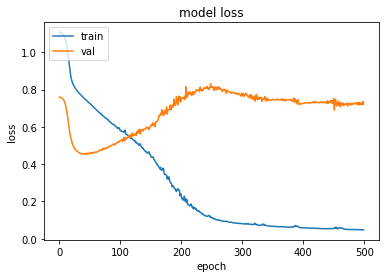

In [94]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

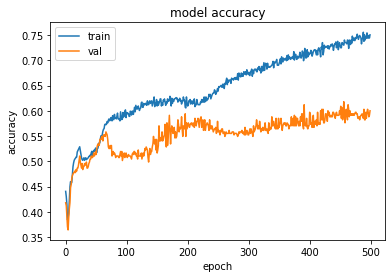

In [95]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Reduce training set </span>

In [99]:
X_train2a, X_test2a, y_train2a, y_test2a = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.3)

In [100]:
l1_norm = 1e-4

model2a = Sequential()
model2a.add(Dense(50, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(10):
    model2a.add(Dense(50, activation='relu', activity_regularizer=l1(l1_norm)))
model2a.add(Dense(3, activation='linear'))

In [101]:
# set learning rate

lr = 1e-4
model2a.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history2a = model2a.fit(X_train2a, y_train2a,
          batch_size=20, epochs=500,
          validation_data=(X_test2a, y_test2a))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 4ms/sample - loss: 0.7647 - accuracy: 0.4264 - val_loss: 1.5585 - val_accuracy: 0.4418
Epoch 2/500
781/781 [==============================] - 0s 258us/sample - loss: 0.7617 - accuracy: 0.4725 - val_loss: 1.5553 - val_accuracy: 0.4657
Epoch 3/500
781/781 [==============================] - 0s 350us/sample - loss: 0.7563 - accuracy: 0.4814 - val_loss: 1.5481 - val_accuracy: 0.4657
Epoch 4/500
781/781 [==============================] - 0s 525us/sample - loss: 0.7407 - accuracy: 0.4981 - val_loss: 1.5287 - val_accuracy: 0.4806
Epoch 5/500
781/781 [==============================] - 0s 517us/sample - loss: 0.7022 - accuracy: 0.5096 - val_loss: 1.4879 - val_accuracy: 0.4955
Epoch 6/500
781/781 [==============================] - 0s 404us/sample - loss: 0.6402 - accuracy: 0.5173 - val_loss: 1.4457 - val_accuracy: 0.4896
Epoch 7/500
781/781 [==============================] - 0s 425us/sample - l

781/781 [==============================] - 0s 440us/sample - loss: 0.1166 - accuracy: 0.6645 - val_loss: 1.6402 - val_accuracy: 0.5104
Epoch 112/500
781/781 [==============================] - 0s 345us/sample - loss: 0.1174 - accuracy: 0.6556 - val_loss: 1.6455 - val_accuracy: 0.4985
Epoch 113/500
781/781 [==============================] - 0s 516us/sample - loss: 0.1481 - accuracy: 0.6530 - val_loss: 1.6410 - val_accuracy: 0.4925
Epoch 114/500
781/781 [==============================] - 0s 495us/sample - loss: 0.1213 - accuracy: 0.6530 - val_loss: 1.6145 - val_accuracy: 0.5194
Epoch 115/500
781/781 [==============================] - 0s 314us/sample - loss: 0.1169 - accuracy: 0.6504 - val_loss: 1.6283 - val_accuracy: 0.5015
Epoch 116/500
781/781 [==============================] - 0s 293us/sample - loss: 0.1171 - accuracy: 0.6594 - val_loss: 1.6337 - val_accuracy: 0.5104
Epoch 117/500
781/781 [==============================] - 0s 304us/sample - loss: 0.1116 - accuracy: 0.6530 - val_loss: 1

781/781 [==============================] - 0s 366us/sample - loss: 0.0814 - accuracy: 0.7119 - val_loss: 1.6420 - val_accuracy: 0.5313
Epoch 167/500
781/781 [==============================] - 0s 403us/sample - loss: 0.0693 - accuracy: 0.7119 - val_loss: 1.6474 - val_accuracy: 0.5552
Epoch 168/500
781/781 [==============================] - 0s 319us/sample - loss: 0.0680 - accuracy: 0.7081 - val_loss: 1.6753 - val_accuracy: 0.5254
Epoch 169/500
781/781 [==============================] - 0s 392us/sample - loss: 0.0742 - accuracy: 0.7055 - val_loss: 1.6668 - val_accuracy: 0.5373
Epoch 170/500
781/781 [==============================] - 0s 399us/sample - loss: 0.0791 - accuracy: 0.7119 - val_loss: 1.6450 - val_accuracy: 0.5463
Epoch 171/500
781/781 [==============================] - 0s 352us/sample - loss: 0.0689 - accuracy: 0.7081 - val_loss: 1.6637 - val_accuracy: 0.5343
Epoch 172/500
781/781 [==============================] - 0s 399us/sample - loss: 0.0695 - accuracy: 0.6978 - val_loss: 1

781/781 [==============================] - 0s 470us/sample - loss: 0.0459 - accuracy: 0.7401 - val_loss: 1.6522 - val_accuracy: 0.5254
Epoch 222/500
781/781 [==============================] - 0s 453us/sample - loss: 0.0452 - accuracy: 0.7439 - val_loss: 1.6638 - val_accuracy: 0.5254
Epoch 223/500
781/781 [==============================] - 0s 440us/sample - loss: 0.0442 - accuracy: 0.7388 - val_loss: 1.6593 - val_accuracy: 0.5313
Epoch 224/500
781/781 [==============================] - 0s 586us/sample - loss: 0.0434 - accuracy: 0.7503 - val_loss: 1.6572 - val_accuracy: 0.5254
Epoch 225/500
781/781 [==============================] - 0s 507us/sample - loss: 0.0434 - accuracy: 0.7554 - val_loss: 1.6647 - val_accuracy: 0.5284
Epoch 226/500
781/781 [==============================] - 0s 622us/sample - loss: 0.0443 - accuracy: 0.7567 - val_loss: 1.6588 - val_accuracy: 0.5403
Epoch 227/500
781/781 [==============================] - 0s 537us/sample - loss: 0.0442 - accuracy: 0.7529 - val_loss: 1

781/781 [==============================] - 0s 449us/sample - loss: 0.0473 - accuracy: 0.7324 - val_loss: 1.6849 - val_accuracy: 0.5075
Epoch 277/500
781/781 [==============================] - 0s 406us/sample - loss: 0.0453 - accuracy: 0.7695 - val_loss: 1.6873 - val_accuracy: 0.5015
Epoch 278/500
781/781 [==============================] - 0s 410us/sample - loss: 0.0452 - accuracy: 0.7695 - val_loss: 1.6799 - val_accuracy: 0.5015
Epoch 279/500
781/781 [==============================] - 0s 388us/sample - loss: 0.0470 - accuracy: 0.7785 - val_loss: 1.6953 - val_accuracy: 0.4925
Epoch 280/500
781/781 [==============================] - 0s 380us/sample - loss: 0.0428 - accuracy: 0.7670 - val_loss: 1.6743 - val_accuracy: 0.5045
Epoch 281/500
781/781 [==============================] - 0s 564us/sample - loss: 0.0617 - accuracy: 0.7798 - val_loss: 1.6756 - val_accuracy: 0.5104
Epoch 282/500
781/781 [==============================] - 0s 591us/sample - loss: 0.0427 - accuracy: 0.7670 - val_loss: 1

781/781 [==============================] - 0s 564us/sample - loss: 0.0303 - accuracy: 0.8131 - val_loss: 1.6812 - val_accuracy: 0.5075
Epoch 332/500
781/781 [==============================] - 0s 577us/sample - loss: 0.0369 - accuracy: 0.7926 - val_loss: 1.6715 - val_accuracy: 0.5104
Epoch 333/500
781/781 [==============================] - 0s 600us/sample - loss: 0.0484 - accuracy: 0.8079 - val_loss: 1.6590 - val_accuracy: 0.5194
Epoch 334/500
781/781 [==============================] - 0s 456us/sample - loss: 0.0317 - accuracy: 0.8054 - val_loss: 1.6783 - val_accuracy: 0.5104
Epoch 335/500
781/781 [==============================] - 0s 417us/sample - loss: 0.0307 - accuracy: 0.8028 - val_loss: 1.6846 - val_accuracy: 0.5075
Epoch 336/500
781/781 [==============================] - 0s 389us/sample - loss: 0.0297 - accuracy: 0.8118 - val_loss: 1.6745 - val_accuracy: 0.5194
Epoch 337/500
781/781 [==============================] - 0s 320us/sample - loss: 0.0298 - accuracy: 0.8118 - val_loss: 1

781/781 [==============================] - 0s 495us/sample - loss: 0.0303 - accuracy: 0.8374 - val_loss: 1.6567 - val_accuracy: 0.5313
Epoch 387/500
781/781 [==============================] - 0s 331us/sample - loss: 0.0300 - accuracy: 0.8412 - val_loss: 1.6604 - val_accuracy: 0.5164
Epoch 388/500
781/781 [==============================] - 0s 505us/sample - loss: 0.0299 - accuracy: 0.8489 - val_loss: 1.6584 - val_accuracy: 0.5224
Epoch 389/500
781/781 [==============================] - 0s 512us/sample - loss: 0.0298 - accuracy: 0.8412 - val_loss: 1.6560 - val_accuracy: 0.5224
Epoch 390/500
781/781 [==============================] - 0s 495us/sample - loss: 0.0295 - accuracy: 0.8399 - val_loss: 1.6626 - val_accuracy: 0.5254
Epoch 391/500
781/781 [==============================] - 0s 518us/sample - loss: 0.0295 - accuracy: 0.8489 - val_loss: 1.6580 - val_accuracy: 0.5194
Epoch 392/500
781/781 [==============================] - 0s 487us/sample - loss: 0.0294 - accuracy: 0.8489 - val_loss: 1

781/781 [==============================] - 0s 573us/sample - loss: 0.0247 - accuracy: 0.8643 - val_loss: 1.6794 - val_accuracy: 0.4955
Epoch 442/500
781/781 [==============================] - 0s 564us/sample - loss: 0.0245 - accuracy: 0.8707 - val_loss: 1.6821 - val_accuracy: 0.4925
Epoch 443/500
781/781 [==============================] - 0s 603us/sample - loss: 0.0242 - accuracy: 0.8630 - val_loss: 1.6762 - val_accuracy: 0.4985
Epoch 444/500
781/781 [==============================] - 0s 555us/sample - loss: 0.0240 - accuracy: 0.8604 - val_loss: 1.6809 - val_accuracy: 0.4985
Epoch 445/500
781/781 [==============================] - 0s 321us/sample - loss: 0.0254 - accuracy: 0.8528 - val_loss: 1.6803 - val_accuracy: 0.4955
Epoch 446/500
781/781 [==============================] - 0s 509us/sample - loss: 0.0243 - accuracy: 0.8566 - val_loss: 1.6743 - val_accuracy: 0.4985
Epoch 447/500
781/781 [==============================] - 0s 345us/sample - loss: 0.0249 - accuracy: 0.8553 - val_loss: 1

781/781 [==============================] - 0s 358us/sample - loss: 0.0261 - accuracy: 0.8592 - val_loss: 1.6593 - val_accuracy: 0.4955
Epoch 497/500
781/781 [==============================] - 0s 348us/sample - loss: 0.0230 - accuracy: 0.8528 - val_loss: 1.6707 - val_accuracy: 0.4896
Epoch 498/500
781/781 [==============================] - 0s 557us/sample - loss: 0.0242 - accuracy: 0.8694 - val_loss: 1.6799 - val_accuracy: 0.4836
Epoch 499/500
781/781 [==============================] - 0s 451us/sample - loss: 0.0231 - accuracy: 0.8643 - val_loss: 1.6803 - val_accuracy: 0.4746
Epoch 500/500
781/781 [==============================] - 0s 306us/sample - loss: 0.0235 - accuracy: 0.8630 - val_loss: 1.6901 - val_accuracy: 0.4746


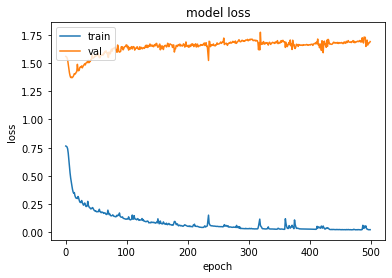

In [102]:
plt.plot(history2a.history['loss'])
plt.plot(history2a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

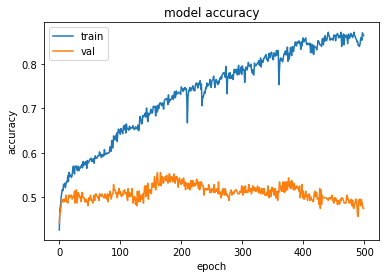

In [103]:
plt.plot(history2a.history['accuracy'])
plt.plot(history2a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Using 1 hidden layer of mean (8) neurons </span>

reading: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [133]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.1)

In [142]:
l1_norm = 1e-4

model3 = Sequential()
model3.add(Dense(13, activation='relu', activity_regularizer=l1(l1_norm)))
model3.add(Dense(8, activation='relu', activity_regularizer=l1(l1_norm)))
model3.add(Dense(3, activation='linear'))

In [143]:
# set learning rate

lr = 1e-4
model3.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history3 = model3.fit(X_train3, y_train3,
          batch_size=100, epochs=5000,
          validation_data=(X_test3, y_test3))


Train on 1004 samples, validate on 112 samples
Epoch 1/5000
1004/1004 [==============================] - 1s 930us/sample - loss: 1.3787 - accuracy: 0.3606 - val_loss: 0.8548 - val_accuracy: 0.3750
Epoch 2/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 1.3619 - accuracy: 0.3606 - val_loss: 0.8377 - val_accuracy: 0.3750
Epoch 3/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 1.3472 - accuracy: 0.3606 - val_loss: 0.8219 - val_accuracy: 0.3661
Epoch 4/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 1.3341 - accuracy: 0.3616 - val_loss: 0.8072 - val_accuracy: 0.3661
Epoch 5/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 1.3206 - accuracy: 0.3606 - val_loss: 0.7920 - val_accuracy: 0.3571
Epoch 6/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 1.3070 - accuracy: 0.3596 - val_loss: 0.7775 - val_accuracy: 0.3571
Epoch 7/5000
1004/1004 [==============================] - 

1004/1004 [==============================] - 0s 41us/sample - loss: 0.9964 - accuracy: 0.4054 - val_loss: 0.4559 - val_accuracy: 0.4107
Epoch 56/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.9933 - accuracy: 0.4064 - val_loss: 0.4533 - val_accuracy: 0.4196
Epoch 57/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.9904 - accuracy: 0.4034 - val_loss: 0.4508 - val_accuracy: 0.4107
Epoch 58/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.9874 - accuracy: 0.4074 - val_loss: 0.4483 - val_accuracy: 0.4107
Epoch 59/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.9843 - accuracy: 0.4074 - val_loss: 0.4462 - val_accuracy: 0.4107
Epoch 60/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.9816 - accuracy: 0.4074 - val_loss: 0.4441 - val_accuracy: 0.4107
Epoch 61/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.9790 - accuracy: 0.4064 - val

1004/1004 [==============================] - 0s 73us/sample - loss: 0.9022 - accuracy: 0.4691 - val_loss: 0.4027 - val_accuracy: 0.4821
Epoch 110/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.9011 - accuracy: 0.4691 - val_loss: 0.4029 - val_accuracy: 0.4911
Epoch 111/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.9000 - accuracy: 0.4691 - val_loss: 0.4023 - val_accuracy: 0.4911
Epoch 112/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8988 - accuracy: 0.4741 - val_loss: 0.4018 - val_accuracy: 0.4911
Epoch 113/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8974 - accuracy: 0.4751 - val_loss: 0.4014 - val_accuracy: 0.5000
Epoch 114/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8962 - accuracy: 0.4741 - val_loss: 0.4011 - val_accuracy: 0.5000
Epoch 115/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8950 - accuracy: 0.4741 

1004/1004 [==============================] - 0s 72us/sample - loss: 0.8529 - accuracy: 0.4900 - val_loss: 0.3941 - val_accuracy: 0.4821
Epoch 164/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8521 - accuracy: 0.4910 - val_loss: 0.3941 - val_accuracy: 0.4821
Epoch 165/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8516 - accuracy: 0.4930 - val_loss: 0.3940 - val_accuracy: 0.4821
Epoch 166/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.8511 - accuracy: 0.4930 - val_loss: 0.3938 - val_accuracy: 0.4821
Epoch 167/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8506 - accuracy: 0.4930 - val_loss: 0.3938 - val_accuracy: 0.4821
Epoch 168/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8500 - accuracy: 0.4940 - val_loss: 0.3937 - val_accuracy: 0.4821
Epoch 169/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8496 - accuracy: 0.4940 

1004/1004 [==============================] - 0s 74us/sample - loss: 0.8262 - accuracy: 0.5000 - val_loss: 0.3955 - val_accuracy: 0.4643
Epoch 218/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8259 - accuracy: 0.5010 - val_loss: 0.3953 - val_accuracy: 0.4643
Epoch 219/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8254 - accuracy: 0.5010 - val_loss: 0.3952 - val_accuracy: 0.4732
Epoch 220/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.8249 - accuracy: 0.5010 - val_loss: 0.3956 - val_accuracy: 0.4732
Epoch 221/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8244 - accuracy: 0.5010 - val_loss: 0.3956 - val_accuracy: 0.4732
Epoch 222/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8240 - accuracy: 0.5020 - val_loss: 0.3957 - val_accuracy: 0.4732
Epoch 223/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8236 - accuracy: 0.5020 

1004/1004 [==============================] - 0s 72us/sample - loss: 0.8076 - accuracy: 0.4950 - val_loss: 0.3941 - val_accuracy: 0.4821
Epoch 272/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8073 - accuracy: 0.4960 - val_loss: 0.3939 - val_accuracy: 0.4821
Epoch 273/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8070 - accuracy: 0.4960 - val_loss: 0.3939 - val_accuracy: 0.4821
Epoch 274/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8066 - accuracy: 0.4980 - val_loss: 0.3936 - val_accuracy: 0.4821
Epoch 275/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8063 - accuracy: 0.5000 - val_loss: 0.3937 - val_accuracy: 0.4821
Epoch 276/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8061 - accuracy: 0.4990 - val_loss: 0.3935 - val_accuracy: 0.4911
Epoch 277/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8057 - accuracy: 0.5000 

1004/1004 [==============================] - 0s 86us/sample - loss: 0.7941 - accuracy: 0.5010 - val_loss: 0.3919 - val_accuracy: 0.4911
Epoch 326/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7939 - accuracy: 0.5000 - val_loss: 0.3917 - val_accuracy: 0.4911
Epoch 327/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7938 - accuracy: 0.5000 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 328/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7937 - accuracy: 0.4970 - val_loss: 0.3905 - val_accuracy: 0.4911
Epoch 329/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7938 - accuracy: 0.4980 - val_loss: 0.3903 - val_accuracy: 0.4911
Epoch 330/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7935 - accuracy: 0.4960 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 331/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7931 - accuracy: 0.4970 

1004/1004 [==============================] - 0s 46us/sample - loss: 0.7837 - accuracy: 0.5000 - val_loss: 0.3938 - val_accuracy: 0.5179
Epoch 380/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7835 - accuracy: 0.5010 - val_loss: 0.3935 - val_accuracy: 0.5179
Epoch 381/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7832 - accuracy: 0.5020 - val_loss: 0.3933 - val_accuracy: 0.5179
Epoch 382/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7831 - accuracy: 0.5050 - val_loss: 0.3932 - val_accuracy: 0.5179
Epoch 383/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7828 - accuracy: 0.5050 - val_loss: 0.3930 - val_accuracy: 0.5268
Epoch 384/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7827 - accuracy: 0.5050 - val_loss: 0.3929 - val_accuracy: 0.5268
Epoch 385/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7824 - accuracy: 0.5060 

1004/1004 [==============================] - 0s 87us/sample - loss: 0.7748 - accuracy: 0.5169 - val_loss: 0.3905 - val_accuracy: 0.5089
Epoch 434/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7747 - accuracy: 0.5149 - val_loss: 0.3910 - val_accuracy: 0.5089
Epoch 435/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.7745 - accuracy: 0.5129 - val_loss: 0.3917 - val_accuracy: 0.5089
Epoch 436/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7745 - accuracy: 0.5129 - val_loss: 0.3918 - val_accuracy: 0.5089
Epoch 437/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7743 - accuracy: 0.5149 - val_loss: 0.3914 - val_accuracy: 0.5089
Epoch 438/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7741 - accuracy: 0.5149 - val_loss: 0.3910 - val_accuracy: 0.5089
Epoch 439/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7739 - accuracy: 0.5139

1004/1004 [==============================] - 0s 74us/sample - loss: 0.7679 - accuracy: 0.5189 - val_loss: 0.3894 - val_accuracy: 0.5089
Epoch 488/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7678 - accuracy: 0.5189 - val_loss: 0.3895 - val_accuracy: 0.5089
Epoch 489/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.7676 - accuracy: 0.5169 - val_loss: 0.3896 - val_accuracy: 0.5089
Epoch 490/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7676 - accuracy: 0.5189 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 491/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7674 - accuracy: 0.5199 - val_loss: 0.3899 - val_accuracy: 0.5089
Epoch 492/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.7673 - accuracy: 0.5199 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 493/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7671 - accuracy: 0.5209

1004/1004 [==============================] - 0s 84us/sample - loss: 0.7623 - accuracy: 0.5189 - val_loss: 0.3881 - val_accuracy: 0.5179
Epoch 542/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7622 - accuracy: 0.5199 - val_loss: 0.3890 - val_accuracy: 0.5268
Epoch 543/5000
1004/1004 [==============================] - 0s 99us/sample - loss: 0.7621 - accuracy: 0.5199 - val_loss: 0.3892 - val_accuracy: 0.5268
Epoch 544/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7620 - accuracy: 0.5179 - val_loss: 0.3891 - val_accuracy: 0.5268
Epoch 545/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7618 - accuracy: 0.5209 - val_loss: 0.3881 - val_accuracy: 0.5089
Epoch 546/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.7618 - accuracy: 0.5249 - val_loss: 0.3880 - val_accuracy: 0.5089
Epoch 547/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7617 - accuracy: 0.524

1004/1004 [==============================] - 0s 51us/sample - loss: 0.7576 - accuracy: 0.5229 - val_loss: 0.3848 - val_accuracy: 0.5357
Epoch 596/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7575 - accuracy: 0.5239 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 597/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7574 - accuracy: 0.5249 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 598/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7572 - accuracy: 0.5249 - val_loss: 0.3847 - val_accuracy: 0.5357
Epoch 599/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7572 - accuracy: 0.5269 - val_loss: 0.3841 - val_accuracy: 0.5357
Epoch 600/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7570 - accuracy: 0.5259 - val_loss: 0.3840 - val_accuracy: 0.5357
Epoch 601/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7569 - accuracy: 0.5239 

1004/1004 [==============================] - 0s 45us/sample - loss: 0.7523 - accuracy: 0.5239 - val_loss: 0.3888 - val_accuracy: 0.5268
Epoch 650/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7523 - accuracy: 0.5239 - val_loss: 0.3889 - val_accuracy: 0.5268
Epoch 651/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7522 - accuracy: 0.5249 - val_loss: 0.3889 - val_accuracy: 0.5357
Epoch 652/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7521 - accuracy: 0.5239 - val_loss: 0.3894 - val_accuracy: 0.5357
Epoch 653/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7520 - accuracy: 0.5249 - val_loss: 0.3899 - val_accuracy: 0.5268
Epoch 654/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.7520 - accuracy: 0.5259 - val_loss: 0.3891 - val_accuracy: 0.5357
Epoch 655/5000
1004/1004 [==============================] - 0s 109us/sample - loss: 0.7517 - accuracy: 0.525

1004/1004 [==============================] - 0s 67us/sample - loss: 0.7475 - accuracy: 0.5299 - val_loss: 0.3860 - val_accuracy: 0.5536
Epoch 704/5000
1004/1004 [==============================] - 0s 119us/sample - loss: 0.7474 - accuracy: 0.5309 - val_loss: 0.3864 - val_accuracy: 0.5536
Epoch 705/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7473 - accuracy: 0.5309 - val_loss: 0.3869 - val_accuracy: 0.5536
Epoch 706/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7472 - accuracy: 0.5329 - val_loss: 0.3876 - val_accuracy: 0.5536
Epoch 707/5000
1004/1004 [==============================] - 0s 108us/sample - loss: 0.7471 - accuracy: 0.5329 - val_loss: 0.3877 - val_accuracy: 0.5536
Epoch 708/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.7470 - accuracy: 0.5329 - val_loss: 0.3878 - val_accuracy: 0.5536
Epoch 709/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.7470 - accuracy: 0.

Epoch 757/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7432 - accuracy: 0.5319 - val_loss: 0.3863 - val_accuracy: 0.5357
Epoch 758/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7432 - accuracy: 0.5319 - val_loss: 0.3851 - val_accuracy: 0.5446
Epoch 759/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7431 - accuracy: 0.5329 - val_loss: 0.3847 - val_accuracy: 0.5446
Epoch 760/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7430 - accuracy: 0.5349 - val_loss: 0.3846 - val_accuracy: 0.5446
Epoch 761/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7429 - accuracy: 0.5329 - val_loss: 0.3852 - val_accuracy: 0.5446
Epoch 762/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7428 - accuracy: 0.5329 - val_loss: 0.3855 - val_accuracy: 0.5446
Epoch 763/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7428 - ac

1004/1004 [==============================] - 0s 32us/sample - loss: 0.7393 - accuracy: 0.5359 - val_loss: 0.3837 - val_accuracy: 0.5357
Epoch 812/5000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.7393 - accuracy: 0.5369 - val_loss: 0.3840 - val_accuracy: 0.5357
Epoch 813/5000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.7392 - accuracy: 0.5369 - val_loss: 0.3839 - val_accuracy: 0.5357
Epoch 814/5000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.7391 - accuracy: 0.5378 - val_loss: 0.3840 - val_accuracy: 0.5446
Epoch 815/5000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.7390 - accuracy: 0.5378 - val_loss: 0.3842 - val_accuracy: 0.5446
Epoch 816/5000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.7390 - accuracy: 0.5388 - val_loss: 0.3840 - val_accuracy: 0.5357
Epoch 817/5000
1004/1004 [==============================] - 0s 31us/sample - loss: 0.7388 - accuracy: 0.5378 

1004/1004 [==============================] - 0s 85us/sample - loss: 0.7357 - accuracy: 0.5398 - val_loss: 0.3828 - val_accuracy: 0.5536
Epoch 866/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7356 - accuracy: 0.5408 - val_loss: 0.3828 - val_accuracy: 0.5446
Epoch 867/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7355 - accuracy: 0.5388 - val_loss: 0.3824 - val_accuracy: 0.5446
Epoch 868/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7354 - accuracy: 0.5388 - val_loss: 0.3821 - val_accuracy: 0.5536
Epoch 869/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7355 - accuracy: 0.5398 - val_loss: 0.3810 - val_accuracy: 0.5536
Epoch 870/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.7353 - accuracy: 0.5388 - val_loss: 0.3808 - val_accuracy: 0.5536
Epoch 871/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7352 - accuracy: 0.5388 

1004/1004 [==============================] - 0s 78us/sample - loss: 0.7320 - accuracy: 0.5388 - val_loss: 0.3858 - val_accuracy: 0.5446
Epoch 920/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7319 - accuracy: 0.5388 - val_loss: 0.3859 - val_accuracy: 0.5536
Epoch 921/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7318 - accuracy: 0.5408 - val_loss: 0.3858 - val_accuracy: 0.5625
Epoch 922/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7317 - accuracy: 0.5418 - val_loss: 0.3858 - val_accuracy: 0.5625
Epoch 923/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7317 - accuracy: 0.5418 - val_loss: 0.3856 - val_accuracy: 0.5625
Epoch 924/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7316 - accuracy: 0.5428 - val_loss: 0.3858 - val_accuracy: 0.5625
Epoch 925/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7315 - accuracy: 0.5418 

1004/1004 [==============================] - 0s 71us/sample - loss: 0.7287 - accuracy: 0.5349 - val_loss: 0.3887 - val_accuracy: 0.5625
Epoch 974/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7287 - accuracy: 0.5359 - val_loss: 0.3887 - val_accuracy: 0.5714
Epoch 975/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7286 - accuracy: 0.5369 - val_loss: 0.3888 - val_accuracy: 0.5714
Epoch 976/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7284 - accuracy: 0.5369 - val_loss: 0.3887 - val_accuracy: 0.5714
Epoch 977/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7284 - accuracy: 0.5388 - val_loss: 0.3892 - val_accuracy: 0.5714
Epoch 978/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7283 - accuracy: 0.5418 - val_loss: 0.3891 - val_accuracy: 0.5714
Epoch 979/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7283 - accuracy: 0.5428 

1004/1004 [==============================] - 0s 90us/sample - loss: 0.7257 - accuracy: 0.5428 - val_loss: 0.3930 - val_accuracy: 0.5625
Epoch 1028/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7256 - accuracy: 0.5428 - val_loss: 0.3929 - val_accuracy: 0.5714
Epoch 1029/5000
1004/1004 [==============================] - 0s 117us/sample - loss: 0.7256 - accuracy: 0.5428 - val_loss: 0.3929 - val_accuracy: 0.5536
Epoch 1030/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.7256 - accuracy: 0.5418 - val_loss: 0.3939 - val_accuracy: 0.5536
Epoch 1031/5000
1004/1004 [==============================] - 0s 103us/sample - loss: 0.7256 - accuracy: 0.5438 - val_loss: 0.3944 - val_accuracy: 0.5536
Epoch 1032/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7256 - accuracy: 0.5438 - val_loss: 0.3945 - val_accuracy: 0.5536
Epoch 1033/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7257 - accuracy:

Epoch 1081/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7226 - accuracy: 0.5408 - val_loss: 0.3903 - val_accuracy: 0.5446
Epoch 1082/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7225 - accuracy: 0.5369 - val_loss: 0.3900 - val_accuracy: 0.5446
Epoch 1083/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7224 - accuracy: 0.5378 - val_loss: 0.3900 - val_accuracy: 0.5357
Epoch 1084/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7224 - accuracy: 0.5388 - val_loss: 0.3904 - val_accuracy: 0.5357
Epoch 1085/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7222 - accuracy: 0.5398 - val_loss: 0.3907 - val_accuracy: 0.5357
Epoch 1086/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7223 - accuracy: 0.5378 - val_loss: 0.3895 - val_accuracy: 0.5357
Epoch 1087/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.72

Epoch 1135/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7193 - accuracy: 0.5428 - val_loss: 0.3892 - val_accuracy: 0.5625
Epoch 1136/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7193 - accuracy: 0.5398 - val_loss: 0.3895 - val_accuracy: 0.5625
Epoch 1137/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7194 - accuracy: 0.5388 - val_loss: 0.3895 - val_accuracy: 0.5625
Epoch 1138/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7194 - accuracy: 0.5388 - val_loss: 0.3902 - val_accuracy: 0.5625
Epoch 1139/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0.7193 - accuracy: 0.5428 - val_loss: 0.3909 - val_accuracy: 0.5625
Epoch 1140/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7194 - accuracy: 0.5388 - val_loss: 0.3920 - val_accuracy: 0.5536
Epoch 1141/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0

Epoch 1189/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7164 - accuracy: 0.5458 - val_loss: 0.3832 - val_accuracy: 0.5804
Epoch 1190/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7164 - accuracy: 0.5448 - val_loss: 0.3830 - val_accuracy: 0.5804
Epoch 1191/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7164 - accuracy: 0.5448 - val_loss: 0.3832 - val_accuracy: 0.5714
Epoch 1192/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7162 - accuracy: 0.5438 - val_loss: 0.3836 - val_accuracy: 0.5714
Epoch 1193/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7162 - accuracy: 0.5428 - val_loss: 0.3839 - val_accuracy: 0.5804
Epoch 1194/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7162 - accuracy: 0.5438 - val_loss: 0.3835 - val_accuracy: 0.5714
Epoch 1195/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.71

Epoch 1243/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7136 - accuracy: 0.5448 - val_loss: 0.3837 - val_accuracy: 0.5714
Epoch 1244/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7136 - accuracy: 0.5448 - val_loss: 0.3835 - val_accuracy: 0.5714
Epoch 1245/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7135 - accuracy: 0.5458 - val_loss: 0.3831 - val_accuracy: 0.5714
Epoch 1246/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7134 - accuracy: 0.5458 - val_loss: 0.3830 - val_accuracy: 0.5714
Epoch 1247/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7134 - accuracy: 0.5458 - val_loss: 0.3833 - val_accuracy: 0.5714
Epoch 1248/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7133 - accuracy: 0.5458 - val_loss: 0.3837 - val_accuracy: 0.5714
Epoch 1249/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.71

Epoch 1297/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7110 - accuracy: 0.5468 - val_loss: 0.3817 - val_accuracy: 0.5625
Epoch 1298/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7110 - accuracy: 0.5468 - val_loss: 0.3819 - val_accuracy: 0.5714
Epoch 1299/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7110 - accuracy: 0.5468 - val_loss: 0.3808 - val_accuracy: 0.5625
Epoch 1300/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7109 - accuracy: 0.5478 - val_loss: 0.3809 - val_accuracy: 0.5625
Epoch 1301/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7108 - accuracy: 0.5458 - val_loss: 0.3816 - val_accuracy: 0.5625
Epoch 1302/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7108 - accuracy: 0.5478 - val_loss: 0.3818 - val_accuracy: 0.5625
Epoch 1303/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.71

Epoch 1351/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7084 - accuracy: 0.5448 - val_loss: 0.3816 - val_accuracy: 0.5625
Epoch 1352/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7084 - accuracy: 0.5448 - val_loss: 0.3814 - val_accuracy: 0.5625
Epoch 1353/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7082 - accuracy: 0.5458 - val_loss: 0.3820 - val_accuracy: 0.5625
Epoch 1354/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.7082 - accuracy: 0.5448 - val_loss: 0.3821 - val_accuracy: 0.5625
Epoch 1355/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3818 - val_accuracy: 0.5625
Epoch 1356/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3817 - val_accuracy: 0.5625
Epoch 1357/5000
1004/1004 [==============================] - 0s 130us/sample - loss: 0.

Epoch 1405/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7056 - accuracy: 0.5418 - val_loss: 0.3830 - val_accuracy: 0.5625
Epoch 1406/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7056 - accuracy: 0.5448 - val_loss: 0.3838 - val_accuracy: 0.5714
Epoch 1407/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7056 - accuracy: 0.5438 - val_loss: 0.3838 - val_accuracy: 0.5714
Epoch 1408/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7056 - accuracy: 0.5438 - val_loss: 0.3836 - val_accuracy: 0.5714
Epoch 1409/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7055 - accuracy: 0.5448 - val_loss: 0.3836 - val_accuracy: 0.5714
Epoch 1410/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7054 - accuracy: 0.5448 - val_loss: 0.3848 - val_accuracy: 0.5625
Epoch 1411/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.70

Epoch 1459/5000
1004/1004 [==============================] - 0s 127us/sample - loss: 0.7031 - accuracy: 0.5438 - val_loss: 0.3799 - val_accuracy: 0.5714
Epoch 1460/5000
1004/1004 [==============================] - 0s 120us/sample - loss: 0.7029 - accuracy: 0.5428 - val_loss: 0.3802 - val_accuracy: 0.5714
Epoch 1461/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.7029 - accuracy: 0.5408 - val_loss: 0.3802 - val_accuracy: 0.5714
Epoch 1462/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7028 - accuracy: 0.5408 - val_loss: 0.3802 - val_accuracy: 0.5714
Epoch 1463/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7027 - accuracy: 0.5408 - val_loss: 0.3803 - val_accuracy: 0.5714
Epoch 1464/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.7027 - accuracy: 0.5408 - val_loss: 0.3806 - val_accuracy: 0.5714
Epoch 1465/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 

Epoch 1513/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7005 - accuracy: 0.5398 - val_loss: 0.3786 - val_accuracy: 0.5625
Epoch 1514/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7007 - accuracy: 0.5388 - val_loss: 0.3768 - val_accuracy: 0.5625
Epoch 1515/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7007 - accuracy: 0.5378 - val_loss: 0.3763 - val_accuracy: 0.5625
Epoch 1516/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7006 - accuracy: 0.5359 - val_loss: 0.3764 - val_accuracy: 0.5536
Epoch 1517/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7005 - accuracy: 0.5369 - val_loss: 0.3765 - val_accuracy: 0.5536
Epoch 1518/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7005 - accuracy: 0.5388 - val_loss: 0.3757 - val_accuracy: 0.5536
Epoch 1519/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.70

Epoch 1567/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6979 - accuracy: 0.5369 - val_loss: 0.3811 - val_accuracy: 0.5446
Epoch 1568/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6979 - accuracy: 0.5359 - val_loss: 0.3808 - val_accuracy: 0.5446
Epoch 1569/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6979 - accuracy: 0.5369 - val_loss: 0.3807 - val_accuracy: 0.5446
Epoch 1570/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.6977 - accuracy: 0.5378 - val_loss: 0.3818 - val_accuracy: 0.5446
Epoch 1571/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6977 - accuracy: 0.5369 - val_loss: 0.3827 - val_accuracy: 0.5446
Epoch 1572/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6978 - accuracy: 0.5388 - val_loss: 0.3835 - val_accuracy: 0.5446
Epoch 1573/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6

Epoch 1621/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6959 - accuracy: 0.5438 - val_loss: 0.3853 - val_accuracy: 0.5804
Epoch 1622/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6958 - accuracy: 0.5428 - val_loss: 0.3856 - val_accuracy: 0.5804
Epoch 1623/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6959 - accuracy: 0.5428 - val_loss: 0.3854 - val_accuracy: 0.5804
Epoch 1624/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6958 - accuracy: 0.5418 - val_loss: 0.3854 - val_accuracy: 0.5804
Epoch 1625/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6957 - accuracy: 0.5418 - val_loss: 0.3858 - val_accuracy: 0.5804
Epoch 1626/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6958 - accuracy: 0.5428 - val_loss: 0.3866 - val_accuracy: 0.5804
Epoch 1627/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.69

Epoch 1675/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6938 - accuracy: 0.5438 - val_loss: 0.3855 - val_accuracy: 0.5625
Epoch 1676/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6937 - accuracy: 0.5458 - val_loss: 0.3864 - val_accuracy: 0.5625
Epoch 1677/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6937 - accuracy: 0.5428 - val_loss: 0.3881 - val_accuracy: 0.5446
Epoch 1678/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6939 - accuracy: 0.5408 - val_loss: 0.3885 - val_accuracy: 0.5446
Epoch 1679/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6938 - accuracy: 0.5418 - val_loss: 0.3882 - val_accuracy: 0.5446
Epoch 1680/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6938 - accuracy: 0.5418 - val_loss: 0.3873 - val_accuracy: 0.5446
Epoch 1681/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.69

Epoch 1729/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6920 - accuracy: 0.5438 - val_loss: 0.3804 - val_accuracy: 0.5446
Epoch 1730/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6920 - accuracy: 0.5438 - val_loss: 0.3805 - val_accuracy: 0.5446
Epoch 1731/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6919 - accuracy: 0.5458 - val_loss: 0.3809 - val_accuracy: 0.5536
Epoch 1732/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6919 - accuracy: 0.5448 - val_loss: 0.3804 - val_accuracy: 0.5536
Epoch 1733/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6918 - accuracy: 0.5438 - val_loss: 0.3809 - val_accuracy: 0.5625
Epoch 1734/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6918 - accuracy: 0.5438 - val_loss: 0.3812 - val_accuracy: 0.5625
Epoch 1735/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.69

Epoch 1783/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6900 - accuracy: 0.5418 - val_loss: 0.3830 - val_accuracy: 0.5625
Epoch 1784/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.6899 - accuracy: 0.5418 - val_loss: 0.3832 - val_accuracy: 0.5625
Epoch 1785/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6898 - accuracy: 0.5438 - val_loss: 0.3832 - val_accuracy: 0.5625
Epoch 1786/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6898 - accuracy: 0.5438 - val_loss: 0.3838 - val_accuracy: 0.5625
Epoch 1787/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6897 - accuracy: 0.5428 - val_loss: 0.3842 - val_accuracy: 0.5625
Epoch 1788/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6896 - accuracy: 0.5448 - val_loss: 0.3849 - val_accuracy: 0.5625
Epoch 1789/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6

Epoch 1837/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6880 - accuracy: 0.5438 - val_loss: 0.3887 - val_accuracy: 0.5536
Epoch 1838/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6880 - accuracy: 0.5438 - val_loss: 0.3890 - val_accuracy: 0.5536
Epoch 1839/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6881 - accuracy: 0.5418 - val_loss: 0.3905 - val_accuracy: 0.5536
Epoch 1840/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6881 - accuracy: 0.5428 - val_loss: 0.3909 - val_accuracy: 0.5536
Epoch 1841/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6880 - accuracy: 0.5428 - val_loss: 0.3911 - val_accuracy: 0.5536
Epoch 1842/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6880 - accuracy: 0.5418 - val_loss: 0.3913 - val_accuracy: 0.5625
Epoch 1843/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.68

Epoch 1891/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6865 - accuracy: 0.5369 - val_loss: 0.3813 - val_accuracy: 0.5179
Epoch 1892/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6865 - accuracy: 0.5378 - val_loss: 0.3807 - val_accuracy: 0.5179
Epoch 1893/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6863 - accuracy: 0.5369 - val_loss: 0.3810 - val_accuracy: 0.5179
Epoch 1894/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6862 - accuracy: 0.5369 - val_loss: 0.3808 - val_accuracy: 0.5179
Epoch 1895/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6862 - accuracy: 0.5369 - val_loss: 0.3792 - val_accuracy: 0.5179
Epoch 1896/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6864 - accuracy: 0.5378 - val_loss: 0.3789 - val_accuracy: 0.5179
Epoch 1897/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.68

Epoch 1945/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6844 - accuracy: 0.5378 - val_loss: 0.3851 - val_accuracy: 0.5268
Epoch 1946/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6843 - accuracy: 0.5388 - val_loss: 0.3845 - val_accuracy: 0.5268
Epoch 1947/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6844 - accuracy: 0.5388 - val_loss: 0.3833 - val_accuracy: 0.5268
Epoch 1948/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6843 - accuracy: 0.5418 - val_loss: 0.3832 - val_accuracy: 0.5268
Epoch 1949/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6844 - accuracy: 0.5418 - val_loss: 0.3833 - val_accuracy: 0.5268
Epoch 1950/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6843 - accuracy: 0.5408 - val_loss: 0.3842 - val_accuracy: 0.5268
Epoch 1951/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.68

Epoch 1999/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6824 - accuracy: 0.5398 - val_loss: 0.3895 - val_accuracy: 0.5357
Epoch 2000/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6823 - accuracy: 0.5388 - val_loss: 0.3890 - val_accuracy: 0.5357
Epoch 2001/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6825 - accuracy: 0.5398 - val_loss: 0.3873 - val_accuracy: 0.5268
Epoch 2002/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6823 - accuracy: 0.5418 - val_loss: 0.3876 - val_accuracy: 0.5268
Epoch 2003/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6822 - accuracy: 0.5408 - val_loss: 0.3879 - val_accuracy: 0.5268
Epoch 2004/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6822 - accuracy: 0.5398 - val_loss: 0.3882 - val_accuracy: 0.5268
Epoch 2005/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.68

Epoch 2053/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6805 - accuracy: 0.5438 - val_loss: 0.3920 - val_accuracy: 0.5357
Epoch 2054/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6804 - accuracy: 0.5408 - val_loss: 0.3919 - val_accuracy: 0.5268
Epoch 2055/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6804 - accuracy: 0.5428 - val_loss: 0.3920 - val_accuracy: 0.5268
Epoch 2056/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6804 - accuracy: 0.5428 - val_loss: 0.3919 - val_accuracy: 0.5179
Epoch 2057/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6804 - accuracy: 0.5418 - val_loss: 0.3916 - val_accuracy: 0.5179
Epoch 2058/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6802 - accuracy: 0.5428 - val_loss: 0.3922 - val_accuracy: 0.5179
Epoch 2059/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.68

Epoch 2107/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6787 - accuracy: 0.5428 - val_loss: 0.3901 - val_accuracy: 0.5357
Epoch 2108/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6786 - accuracy: 0.5418 - val_loss: 0.3899 - val_accuracy: 0.5357
Epoch 2109/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6785 - accuracy: 0.5418 - val_loss: 0.3901 - val_accuracy: 0.5179
Epoch 2110/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6786 - accuracy: 0.5378 - val_loss: 0.3903 - val_accuracy: 0.5089
Epoch 2111/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6784 - accuracy: 0.5408 - val_loss: 0.3902 - val_accuracy: 0.5179
Epoch 2112/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6784 - accuracy: 0.5408 - val_loss: 0.3902 - val_accuracy: 0.5179
Epoch 2113/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.67

Epoch 2161/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6764 - accuracy: 0.5428 - val_loss: 0.3943 - val_accuracy: 0.5089
Epoch 2162/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6764 - accuracy: 0.5418 - val_loss: 0.3949 - val_accuracy: 0.5089
Epoch 2163/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6763 - accuracy: 0.5418 - val_loss: 0.3938 - val_accuracy: 0.5089
Epoch 2164/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6763 - accuracy: 0.5438 - val_loss: 0.3935 - val_accuracy: 0.5179
Epoch 2165/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6764 - accuracy: 0.5438 - val_loss: 0.3930 - val_accuracy: 0.5089
Epoch 2166/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6763 - accuracy: 0.5408 - val_loss: 0.3931 - val_accuracy: 0.5089
Epoch 2167/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.67

Epoch 2215/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6746 - accuracy: 0.5488 - val_loss: 0.3963 - val_accuracy: 0.5179
Epoch 2216/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3963 - val_accuracy: 0.5179
Epoch 2217/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3961 - val_accuracy: 0.5179
Epoch 2218/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6744 - accuracy: 0.5488 - val_loss: 0.3960 - val_accuracy: 0.5179
Epoch 2219/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6744 - accuracy: 0.5488 - val_loss: 0.3959 - val_accuracy: 0.5179
Epoch 2220/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6745 - accuracy: 0.5498 - val_loss: 0.3953 - val_accuracy: 0.5179
Epoch 2221/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.67

Epoch 2269/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6729 - accuracy: 0.5478 - val_loss: 0.3892 - val_accuracy: 0.5089
Epoch 2270/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6727 - accuracy: 0.5478 - val_loss: 0.3907 - val_accuracy: 0.5089
Epoch 2271/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6727 - accuracy: 0.5468 - val_loss: 0.3927 - val_accuracy: 0.5089
Epoch 2272/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6725 - accuracy: 0.5448 - val_loss: 0.3934 - val_accuracy: 0.5089
Epoch 2273/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6725 - accuracy: 0.5438 - val_loss: 0.3937 - val_accuracy: 0.5089
Epoch 2274/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6725 - accuracy: 0.5428 - val_loss: 0.3940 - val_accuracy: 0.5089
Epoch 2275/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.67

Epoch 2323/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6708 - accuracy: 0.5428 - val_loss: 0.3964 - val_accuracy: 0.5089
Epoch 2324/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6708 - accuracy: 0.5408 - val_loss: 0.3949 - val_accuracy: 0.5089
Epoch 2325/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6706 - accuracy: 0.5418 - val_loss: 0.3935 - val_accuracy: 0.5089
Epoch 2326/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6707 - accuracy: 0.5418 - val_loss: 0.3930 - val_accuracy: 0.5089
Epoch 2327/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6707 - accuracy: 0.5428 - val_loss: 0.3924 - val_accuracy: 0.5089
Epoch 2328/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6707 - accuracy: 0.5438 - val_loss: 0.3932 - val_accuracy: 0.5089
Epoch 2329/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.67

Epoch 2377/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6690 - accuracy: 0.5418 - val_loss: 0.4001 - val_accuracy: 0.5179
Epoch 2378/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6691 - accuracy: 0.5418 - val_loss: 0.3985 - val_accuracy: 0.5089
Epoch 2379/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6691 - accuracy: 0.5428 - val_loss: 0.3980 - val_accuracy: 0.5089
Epoch 2380/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6690 - accuracy: 0.5448 - val_loss: 0.3978 - val_accuracy: 0.5089
Epoch 2381/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6690 - accuracy: 0.5468 - val_loss: 0.3991 - val_accuracy: 0.5089
Epoch 2382/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6688 - accuracy: 0.5458 - val_loss: 0.3982 - val_accuracy: 0.5089
Epoch 2383/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.66

Epoch 2431/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6673 - accuracy: 0.5438 - val_loss: 0.4011 - val_accuracy: 0.5089
Epoch 2432/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6673 - accuracy: 0.5438 - val_loss: 0.4009 - val_accuracy: 0.5089
Epoch 2433/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6672 - accuracy: 0.5438 - val_loss: 0.4003 - val_accuracy: 0.5089
Epoch 2434/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6672 - accuracy: 0.5458 - val_loss: 0.4000 - val_accuracy: 0.5089
Epoch 2435/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6671 - accuracy: 0.5448 - val_loss: 0.3995 - val_accuracy: 0.5089
Epoch 2436/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.6671 - accuracy: 0.5428 - val_loss: 0.3993 - val_accuracy: 0.5089
Epoch 2437/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6

Epoch 2485/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6659 - accuracy: 0.5388 - val_loss: 0.3989 - val_accuracy: 0.5089
Epoch 2486/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6657 - accuracy: 0.5418 - val_loss: 0.3994 - val_accuracy: 0.5089
Epoch 2487/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6657 - accuracy: 0.5408 - val_loss: 0.4001 - val_accuracy: 0.5089
Epoch 2488/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6657 - accuracy: 0.5398 - val_loss: 0.3994 - val_accuracy: 0.5089
Epoch 2489/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6656 - accuracy: 0.5388 - val_loss: 0.3977 - val_accuracy: 0.5089
Epoch 2490/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6656 - accuracy: 0.5398 - val_loss: 0.3971 - val_accuracy: 0.5089
Epoch 2491/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.66

Epoch 2539/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6643 - accuracy: 0.5408 - val_loss: 0.3998 - val_accuracy: 0.5179
Epoch 2540/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6642 - accuracy: 0.5408 - val_loss: 0.4001 - val_accuracy: 0.5179
Epoch 2541/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.6642 - accuracy: 0.5408 - val_loss: 0.4004 - val_accuracy: 0.5179
Epoch 2542/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6641 - accuracy: 0.5408 - val_loss: 0.4003 - val_accuracy: 0.5179
Epoch 2543/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6641 - accuracy: 0.5408 - val_loss: 0.4000 - val_accuracy: 0.5179
Epoch 2544/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6641 - accuracy: 0.5418 - val_loss: 0.3972 - val_accuracy: 0.5179
Epoch 2545/5000
1004/1004 [==============================] - 0s 103us/sample - loss: 0.6

Epoch 2593/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6628 - accuracy: 0.5388 - val_loss: 0.4048 - val_accuracy: 0.5179
Epoch 2594/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6627 - accuracy: 0.5388 - val_loss: 0.4050 - val_accuracy: 0.5179
Epoch 2595/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6626 - accuracy: 0.5408 - val_loss: 0.4050 - val_accuracy: 0.5179
Epoch 2596/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6626 - accuracy: 0.5388 - val_loss: 0.4050 - val_accuracy: 0.5179
Epoch 2597/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6627 - accuracy: 0.5408 - val_loss: 0.4070 - val_accuracy: 0.5179
Epoch 2598/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6629 - accuracy: 0.5428 - val_loss: 0.4078 - val_accuracy: 0.5179
Epoch 2599/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.66

Epoch 2647/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6615 - accuracy: 0.5428 - val_loss: 0.4000 - val_accuracy: 0.5179
Epoch 2648/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6614 - accuracy: 0.5448 - val_loss: 0.4009 - val_accuracy: 0.5179
Epoch 2649/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.6628 - accuracy: 0.54 - 0s 79us/sample - loss: 0.6613 - accuracy: 0.5448 - val_loss: 0.4018 - val_accuracy: 0.5179
Epoch 2650/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6613 - accuracy: 0.5448 - val_loss: 0.4028 - val_accuracy: 0.5179
Epoch 2651/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6613 - accuracy: 0.5448 - val_loss: 0.4021 - val_accuracy: 0.5179
Epoch 2652/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6612 - accuracy: 0.5448 - val_loss: 0.4026 - val_accuracy: 0.5179
Epoch 2653/5000
1004/1004 [===================

1004/1004 [==============================] - 0s 86us/sample - loss: 0.6598 - accuracy: 0.5448 - val_loss: 0.4092 - val_accuracy: 0.5179
Epoch 2701/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6598 - accuracy: 0.5428 - val_loss: 0.4092 - val_accuracy: 0.5179
Epoch 2702/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6598 - accuracy: 0.5438 - val_loss: 0.4093 - val_accuracy: 0.5179
Epoch 2703/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6598 - accuracy: 0.5448 - val_loss: 0.4095 - val_accuracy: 0.5179
Epoch 2704/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6597 - accuracy: 0.5448 - val_loss: 0.4100 - val_accuracy: 0.5179
Epoch 2705/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6596 - accuracy: 0.5448 - val_loss: 0.4086 - val_accuracy: 0.5179
Epoch 2706/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6597 - accuracy: 0

1004/1004 [==============================] - 0s 77us/sample - loss: 0.6582 - accuracy: 0.5468 - val_loss: 0.4098 - val_accuracy: 0.5179
Epoch 2755/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.6582 - accuracy: 0.5458 - val_loss: 0.4097 - val_accuracy: 0.5179
Epoch 2756/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6581 - accuracy: 0.5458 - val_loss: 0.4099 - val_accuracy: 0.5179
Epoch 2757/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6581 - accuracy: 0.5458 - val_loss: 0.4104 - val_accuracy: 0.5179
Epoch 2758/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6581 - accuracy: 0.5458 - val_loss: 0.4105 - val_accuracy: 0.5179
Epoch 2759/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6580 - accuracy: 0.5448 - val_loss: 0.4105 - val_accuracy: 0.5179
Epoch 2760/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6581 - accuracy: 0

Epoch 2808/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6568 - accuracy: 0.5518 - val_loss: 0.4158 - val_accuracy: 0.5000
Epoch 2809/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6568 - accuracy: 0.5508 - val_loss: 0.4156 - val_accuracy: 0.5000
Epoch 2810/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6567 - accuracy: 0.5488 - val_loss: 0.4153 - val_accuracy: 0.5089
Epoch 2811/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6567 - accuracy: 0.5478 - val_loss: 0.4149 - val_accuracy: 0.5089
Epoch 2812/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6566 - accuracy: 0.5488 - val_loss: 0.4149 - val_accuracy: 0.5089
Epoch 2813/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6566 - accuracy: 0.5478 - val_loss: 0.4158 - val_accuracy: 0.5089
Epoch 2814/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.65

1004/1004 [==============================] - 0s 75us/sample - loss: 0.6553 - accuracy: 0.5508 - val_loss: 0.4153 - val_accuracy: 0.5089
Epoch 2862/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6553 - accuracy: 0.5528 - val_loss: 0.4150 - val_accuracy: 0.4911
Epoch 2863/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6552 - accuracy: 0.5528 - val_loss: 0.4150 - val_accuracy: 0.5000
Epoch 2864/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6552 - accuracy: 0.5528 - val_loss: 0.4161 - val_accuracy: 0.5089
Epoch 2865/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6552 - accuracy: 0.5518 - val_loss: 0.4164 - val_accuracy: 0.5089
Epoch 2866/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6552 - accuracy: 0.5508 - val_loss: 0.4176 - val_accuracy: 0.5000
Epoch 2867/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6553 - accuracy: 0

Epoch 2915/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6538 - accuracy: 0.5458 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 2916/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6542 - accuracy: 0.5458 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 2917/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6543 - accuracy: 0.5468 - val_loss: 0.4163 - val_accuracy: 0.5000
Epoch 2918/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6543 - accuracy: 0.5478 - val_loss: 0.4177 - val_accuracy: 0.5000
Epoch 2919/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6543 - accuracy: 0.5468 - val_loss: 0.4186 - val_accuracy: 0.5000
Epoch 2920/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6541 - accuracy: 0.5468 - val_loss: 0.4186 - val_accuracy: 0.5000
Epoch 2921/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.65

Epoch 2969/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6525 - accuracy: 0.5518 - val_loss: 0.4189 - val_accuracy: 0.5000
Epoch 2970/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6526 - accuracy: 0.5518 - val_loss: 0.4195 - val_accuracy: 0.5000
Epoch 2971/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6524 - accuracy: 0.5498 - val_loss: 0.4196 - val_accuracy: 0.5000
Epoch 2972/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6523 - accuracy: 0.5508 - val_loss: 0.4190 - val_accuracy: 0.5000
Epoch 2973/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6523 - accuracy: 0.5488 - val_loss: 0.4188 - val_accuracy: 0.5000
Epoch 2974/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6523 - accuracy: 0.5488 - val_loss: 0.4189 - val_accuracy: 0.5000
Epoch 2975/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.65

Epoch 3023/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6511 - accuracy: 0.5528 - val_loss: 0.4172 - val_accuracy: 0.5000
Epoch 3024/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6511 - accuracy: 0.5518 - val_loss: 0.4167 - val_accuracy: 0.5000
Epoch 3025/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6511 - accuracy: 0.5518 - val_loss: 0.4171 - val_accuracy: 0.5000
Epoch 3026/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6511 - accuracy: 0.5508 - val_loss: 0.4166 - val_accuracy: 0.5000
Epoch 3027/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6512 - accuracy: 0.5498 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 3028/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6511 - accuracy: 0.5488 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 3029/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.65

Epoch 3077/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.6498 - accuracy: 0.5498 - val_loss: 0.4217 - val_accuracy: 0.5000
Epoch 3078/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6498 - accuracy: 0.5508 - val_loss: 0.4219 - val_accuracy: 0.5000
Epoch 3079/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6497 - accuracy: 0.5498 - val_loss: 0.4211 - val_accuracy: 0.5000
Epoch 3080/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.4206 - val_accuracy: 0.5000
Epoch 3081/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.4197 - val_accuracy: 0.5000
Epoch 3082/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.4195 - val_accuracy: 0.5000
Epoch 3083/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.64

Epoch 3131/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6485 - accuracy: 0.5468 - val_loss: 0.4266 - val_accuracy: 0.5000
Epoch 3132/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6484 - accuracy: 0.5478 - val_loss: 0.4270 - val_accuracy: 0.5000
Epoch 3133/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6488 - accuracy: 0.5458 - val_loss: 0.4295 - val_accuracy: 0.5000
Epoch 3134/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6486 - accuracy: 0.5458 - val_loss: 0.4298 - val_accuracy: 0.5000
Epoch 3135/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6486 - accuracy: 0.5468 - val_loss: 0.4294 - val_accuracy: 0.5000
Epoch 3136/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6485 - accuracy: 0.5468 - val_loss: 0.4293 - val_accuracy: 0.5000
Epoch 3137/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.64

Epoch 3185/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6473 - accuracy: 0.5518 - val_loss: 0.4318 - val_accuracy: 0.5000
Epoch 3186/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6471 - accuracy: 0.5508 - val_loss: 0.4322 - val_accuracy: 0.5000
Epoch 3187/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6471 - accuracy: 0.5488 - val_loss: 0.4319 - val_accuracy: 0.5000
Epoch 3188/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6470 - accuracy: 0.5488 - val_loss: 0.4318 - val_accuracy: 0.5000
Epoch 3189/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6470 - accuracy: 0.5488 - val_loss: 0.4329 - val_accuracy: 0.5000
Epoch 3190/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6470 - accuracy: 0.5518 - val_loss: 0.4328 - val_accuracy: 0.5000
Epoch 3191/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.64

Epoch 3239/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6455 - accuracy: 0.5498 - val_loss: 0.4312 - val_accuracy: 0.5000
Epoch 3240/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6454 - accuracy: 0.5518 - val_loss: 0.4300 - val_accuracy: 0.5000
Epoch 3241/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6455 - accuracy: 0.5518 - val_loss: 0.4298 - val_accuracy: 0.5000
Epoch 3242/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6454 - accuracy: 0.5518 - val_loss: 0.4299 - val_accuracy: 0.5000
Epoch 3243/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6455 - accuracy: 0.5508 - val_loss: 0.4301 - val_accuracy: 0.5000
Epoch 3244/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6455 - accuracy: 0.5518 - val_loss: 0.4309 - val_accuracy: 0.5000
Epoch 3245/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.64

Epoch 3293/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6443 - accuracy: 0.5518 - val_loss: 0.4316 - val_accuracy: 0.5000
Epoch 3294/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6442 - accuracy: 0.5528 - val_loss: 0.4316 - val_accuracy: 0.5000
Epoch 3295/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6442 - accuracy: 0.5508 - val_loss: 0.4311 - val_accuracy: 0.5000
Epoch 3296/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6444 - accuracy: 0.5498 - val_loss: 0.4288 - val_accuracy: 0.5000
Epoch 3297/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6442 - accuracy: 0.5498 - val_loss: 0.4282 - val_accuracy: 0.5000
Epoch 3298/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6442 - accuracy: 0.5508 - val_loss: 0.4282 - val_accuracy: 0.5000
Epoch 3299/5000
1004/1004 [==============================] - 0s 116us/sample - loss: 0.6

Epoch 3347/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6431 - accuracy: 0.5468 - val_loss: 0.4262 - val_accuracy: 0.5000
Epoch 3348/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6431 - accuracy: 0.5478 - val_loss: 0.4264 - val_accuracy: 0.5000
Epoch 3349/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6431 - accuracy: 0.5478 - val_loss: 0.4268 - val_accuracy: 0.5000
Epoch 3350/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6430 - accuracy: 0.5478 - val_loss: 0.4269 - val_accuracy: 0.5000
Epoch 3351/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6430 - accuracy: 0.5478 - val_loss: 0.4268 - val_accuracy: 0.5000
Epoch 3352/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6430 - accuracy: 0.5478 - val_loss: 0.4270 - val_accuracy: 0.5000
Epoch 3353/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.64

Epoch 3401/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6415 - accuracy: 0.5498 - val_loss: 0.4326 - val_accuracy: 0.5000
Epoch 3402/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6415 - accuracy: 0.5508 - val_loss: 0.4329 - val_accuracy: 0.5000
Epoch 3403/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.6415 - accuracy: 0.5498 - val_loss: 0.4328 - val_accuracy: 0.5000
Epoch 3404/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6414 - accuracy: 0.5488 - val_loss: 0.4332 - val_accuracy: 0.5000
Epoch 3405/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6414 - accuracy: 0.5498 - val_loss: 0.4337 - val_accuracy: 0.5000
Epoch 3406/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6413 - accuracy: 0.5498 - val_loss: 0.4336 - val_accuracy: 0.5000
Epoch 3407/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.64

Epoch 3455/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6406 - accuracy: 0.5528 - val_loss: 0.4454 - val_accuracy: 0.5000
Epoch 3456/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6404 - accuracy: 0.5508 - val_loss: 0.4424 - val_accuracy: 0.5000
Epoch 3457/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6403 - accuracy: 0.5528 - val_loss: 0.4410 - val_accuracy: 0.5000
Epoch 3458/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6402 - accuracy: 0.5538 - val_loss: 0.4410 - val_accuracy: 0.5000
Epoch 3459/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.6402 - accuracy: 0.5508 - val_loss: 0.4443 - val_accuracy: 0.5000
Epoch 3460/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6405 - accuracy: 0.5508 - val_loss: 0.4448 - val_accuracy: 0.5000
Epoch 3461/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.64

Epoch 3509/5000
1004/1004 [==============================] - 0s 109us/sample - loss: 0.6388 - accuracy: 0.5518 - val_loss: 0.4308 - val_accuracy: 0.4911
Epoch 3510/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0.6388 - accuracy: 0.5508 - val_loss: 0.4312 - val_accuracy: 0.4911
Epoch 3511/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6393 - accuracy: 0.5508 - val_loss: 0.4290 - val_accuracy: 0.4821
Epoch 3512/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6389 - accuracy: 0.5498 - val_loss: 0.4291 - val_accuracy: 0.5000
Epoch 3513/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6388 - accuracy: 0.5518 - val_loss: 0.4289 - val_accuracy: 0.5000
Epoch 3514/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6389 - accuracy: 0.5518 - val_loss: 0.4271 - val_accuracy: 0.5000
Epoch 3515/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.

Epoch 3563/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6375 - accuracy: 0.5528 - val_loss: 0.4326 - val_accuracy: 0.4821
Epoch 3564/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6375 - accuracy: 0.5528 - val_loss: 0.4326 - val_accuracy: 0.4911
Epoch 3565/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6374 - accuracy: 0.5548 - val_loss: 0.4332 - val_accuracy: 0.4821
Epoch 3566/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6374 - accuracy: 0.5538 - val_loss: 0.4334 - val_accuracy: 0.4821
Epoch 3567/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6374 - accuracy: 0.5538 - val_loss: 0.4336 - val_accuracy: 0.4821
Epoch 3568/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6373 - accuracy: 0.5548 - val_loss: 0.4342 - val_accuracy: 0.4821
Epoch 3569/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.63

Epoch 3617/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6360 - accuracy: 0.5538 - val_loss: 0.4366 - val_accuracy: 0.4911
Epoch 3618/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6360 - accuracy: 0.5538 - val_loss: 0.4378 - val_accuracy: 0.4821
Epoch 3619/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6360 - accuracy: 0.5538 - val_loss: 0.4396 - val_accuracy: 0.4821
Epoch 3620/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.6361 - accuracy: 0.5538 - val_loss: 0.4391 - val_accuracy: 0.4821
Epoch 3621/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6360 - accuracy: 0.5518 - val_loss: 0.4389 - val_accuracy: 0.4732
Epoch 3622/5000
1004/1004 [==============================] - 0s 99us/sample - loss: 0.6360 - accuracy: 0.5508 - val_loss: 0.4384 - val_accuracy: 0.4911
Epoch 3623/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.63

Epoch 3671/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6349 - accuracy: 0.5528 - val_loss: 0.4393 - val_accuracy: 0.4821
Epoch 3672/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6349 - accuracy: 0.5508 - val_loss: 0.4393 - val_accuracy: 0.4821
Epoch 3673/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6349 - accuracy: 0.5508 - val_loss: 0.4393 - val_accuracy: 0.4821
Epoch 3674/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6349 - accuracy: 0.5508 - val_loss: 0.4403 - val_accuracy: 0.4911
Epoch 3675/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6348 - accuracy: 0.5528 - val_loss: 0.4404 - val_accuracy: 0.4821
Epoch 3676/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6347 - accuracy: 0.5528 - val_loss: 0.4410 - val_accuracy: 0.4821
Epoch 3677/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.63

Epoch 3725/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6333 - accuracy: 0.5558 - val_loss: 0.4369 - val_accuracy: 0.4911
Epoch 3726/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6333 - accuracy: 0.5558 - val_loss: 0.4374 - val_accuracy: 0.4911
Epoch 3727/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6333 - accuracy: 0.5558 - val_loss: 0.4372 - val_accuracy: 0.4911
Epoch 3728/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6332 - accuracy: 0.5558 - val_loss: 0.4376 - val_accuracy: 0.4911
Epoch 3729/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6332 - accuracy: 0.5548 - val_loss: 0.4395 - val_accuracy: 0.5000
Epoch 3730/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6331 - accuracy: 0.5548 - val_loss: 0.4401 - val_accuracy: 0.5000
Epoch 3731/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.63

Epoch 3779/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6321 - accuracy: 0.5508 - val_loss: 0.4386 - val_accuracy: 0.5000
Epoch 3780/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6321 - accuracy: 0.5488 - val_loss: 0.4381 - val_accuracy: 0.5000
Epoch 3781/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6321 - accuracy: 0.5528 - val_loss: 0.4366 - val_accuracy: 0.4911
Epoch 3782/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6321 - accuracy: 0.5528 - val_loss: 0.4368 - val_accuracy: 0.4911
Epoch 3783/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6320 - accuracy: 0.5538 - val_loss: 0.4370 - val_accuracy: 0.4911
Epoch 3784/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6319 - accuracy: 0.5528 - val_loss: 0.4376 - val_accuracy: 0.4911
Epoch 3785/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.63

Epoch 3833/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6313 - accuracy: 0.5568 - val_loss: 0.4485 - val_accuracy: 0.5089
Epoch 3834/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6314 - accuracy: 0.5568 - val_loss: 0.4494 - val_accuracy: 0.5089
Epoch 3835/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.2468 - accuracy: 0.58 - 0s 58us/sample - loss: 0.6313 - accuracy: 0.5568 - val_loss: 0.4495 - val_accuracy: 0.5089
Epoch 3836/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6314 - accuracy: 0.5588 - val_loss: 0.4511 - val_accuracy: 0.4911
Epoch 3837/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6313 - accuracy: 0.5578 - val_loss: 0.4511 - val_accuracy: 0.4911
Epoch 3838/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6312 - accuracy: 0.5588 - val_loss: 0.4516 - val_accuracy: 0.4911
Epoch 3839/5000
1004/1004 [===================

1004/1004 [==============================] - 0s 79us/sample - loss: 0.6295 - accuracy: 0.5558 - val_loss: 0.4406 - val_accuracy: 0.4911
Epoch 3887/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6294 - accuracy: 0.5558 - val_loss: 0.4414 - val_accuracy: 0.4911
Epoch 3888/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6293 - accuracy: 0.5568 - val_loss: 0.4417 - val_accuracy: 0.4911
Epoch 3889/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.6293 - accuracy: 0.5568 - val_loss: 0.4417 - val_accuracy: 0.4911
Epoch 3890/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6292 - accuracy: 0.5558 - val_loss: 0.4429 - val_accuracy: 0.4911
Epoch 3891/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6293 - accuracy: 0.5548 - val_loss: 0.4439 - val_accuracy: 0.4911
Epoch 3892/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6294 - accuracy: 

Epoch 3940/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6283 - accuracy: 0.5548 - val_loss: 0.4548 - val_accuracy: 0.4821
Epoch 3941/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6283 - accuracy: 0.5548 - val_loss: 0.4547 - val_accuracy: 0.4911
Epoch 3942/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6282 - accuracy: 0.5558 - val_loss: 0.4548 - val_accuracy: 0.4911
Epoch 3943/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6281 - accuracy: 0.5558 - val_loss: 0.4548 - val_accuracy: 0.4911
Epoch 3944/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6280 - accuracy: 0.5558 - val_loss: 0.4546 - val_accuracy: 0.4911
Epoch 3945/5000
1004/1004 [==============================] - 0s 106us/sample - loss: 0.6279 - accuracy: 0.5558 - val_loss: 0.4536 - val_accuracy: 0.4911
Epoch 3946/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.6

Epoch 3994/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6262 - accuracy: 0.5568 - val_loss: 0.4478 - val_accuracy: 0.5000
Epoch 3995/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6260 - accuracy: 0.5578 - val_loss: 0.4458 - val_accuracy: 0.5000
Epoch 3996/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6261 - accuracy: 0.5568 - val_loss: 0.4451 - val_accuracy: 0.5000
Epoch 3997/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6261 - accuracy: 0.5578 - val_loss: 0.4452 - val_accuracy: 0.4911
Epoch 3998/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6260 - accuracy: 0.5578 - val_loss: 0.4453 - val_accuracy: 0.5000
Epoch 3999/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6260 - accuracy: 0.5568 - val_loss: 0.4453 - val_accuracy: 0.5000
Epoch 4000/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.62

Epoch 4048/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6252 - accuracy: 0.5538 - val_loss: 0.4559 - val_accuracy: 0.5089
Epoch 4049/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6252 - accuracy: 0.5548 - val_loss: 0.4566 - val_accuracy: 0.5089
Epoch 4050/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6252 - accuracy: 0.5568 - val_loss: 0.4544 - val_accuracy: 0.5089
Epoch 4051/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6249 - accuracy: 0.5538 - val_loss: 0.4541 - val_accuracy: 0.5179
Epoch 4052/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6249 - accuracy: 0.5558 - val_loss: 0.4546 - val_accuracy: 0.4821
Epoch 4053/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6249 - accuracy: 0.5568 - val_loss: 0.4550 - val_accuracy: 0.4821
Epoch 4054/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.62

Epoch 4102/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6239 - accuracy: 0.5478 - val_loss: 0.4485 - val_accuracy: 0.4911
Epoch 4103/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6237 - accuracy: 0.5508 - val_loss: 0.4507 - val_accuracy: 0.4911
Epoch 4104/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6235 - accuracy: 0.5488 - val_loss: 0.4536 - val_accuracy: 0.4911
Epoch 4105/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6234 - accuracy: 0.5478 - val_loss: 0.4572 - val_accuracy: 0.4911
Epoch 4106/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6236 - accuracy: 0.5498 - val_loss: 0.4581 - val_accuracy: 0.4911
Epoch 4107/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6236 - accuracy: 0.5488 - val_loss: 0.4592 - val_accuracy: 0.4821
Epoch 4108/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.62

Epoch 4156/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.6223 - accuracy: 0.5468 - val_loss: 0.4603 - val_accuracy: 0.5000
Epoch 4157/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6224 - accuracy: 0.5468 - val_loss: 0.4627 - val_accuracy: 0.5000
Epoch 4158/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6225 - accuracy: 0.5458 - val_loss: 0.4632 - val_accuracy: 0.5000
Epoch 4159/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6223 - accuracy: 0.5468 - val_loss: 0.4627 - val_accuracy: 0.5000
Epoch 4160/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6224 - accuracy: 0.5468 - val_loss: 0.4629 - val_accuracy: 0.5000
Epoch 4161/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6223 - accuracy: 0.5468 - val_loss: 0.4647 - val_accuracy: 0.5000
Epoch 4162/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.62

Epoch 4210/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6209 - accuracy: 0.5498 - val_loss: 0.4501 - val_accuracy: 0.4911
Epoch 4211/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6212 - accuracy: 0.5468 - val_loss: 0.4520 - val_accuracy: 0.4821
Epoch 4212/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6208 - accuracy: 0.5458 - val_loss: 0.4525 - val_accuracy: 0.4911
Epoch 4213/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6208 - accuracy: 0.5458 - val_loss: 0.4534 - val_accuracy: 0.4821
Epoch 4214/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.6208 - accuracy: 0.5458 - val_loss: 0.4538 - val_accuracy: 0.4911
Epoch 4215/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6207 - accuracy: 0.5478 - val_loss: 0.4540 - val_accuracy: 0.4911
Epoch 4216/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.62

Epoch 4264/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6199 - accuracy: 0.5468 - val_loss: 0.4543 - val_accuracy: 0.4911
Epoch 4265/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6196 - accuracy: 0.5458 - val_loss: 0.4538 - val_accuracy: 0.4911
Epoch 4266/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6197 - accuracy: 0.5458 - val_loss: 0.4534 - val_accuracy: 0.4821
Epoch 4267/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6196 - accuracy: 0.5478 - val_loss: 0.4532 - val_accuracy: 0.4821
Epoch 4268/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6197 - accuracy: 0.5488 - val_loss: 0.4526 - val_accuracy: 0.4911
Epoch 4269/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6196 - accuracy: 0.5478 - val_loss: 0.4526 - val_accuracy: 0.4911
Epoch 4270/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.61

Epoch 4318/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6182 - accuracy: 0.5518 - val_loss: 0.4518 - val_accuracy: 0.5000
Epoch 4319/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6181 - accuracy: 0.5518 - val_loss: 0.4518 - val_accuracy: 0.5000
Epoch 4320/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6181 - accuracy: 0.5528 - val_loss: 0.4523 - val_accuracy: 0.4911
Epoch 4321/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6181 - accuracy: 0.5498 - val_loss: 0.4525 - val_accuracy: 0.4911
Epoch 4322/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6180 - accuracy: 0.5508 - val_loss: 0.4532 - val_accuracy: 0.4911
Epoch 4323/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6179 - accuracy: 0.5488 - val_loss: 0.4549 - val_accuracy: 0.4911
Epoch 4324/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.61

Epoch 4372/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6168 - accuracy: 0.5508 - val_loss: 0.4620 - val_accuracy: 0.5000
Epoch 4373/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6167 - accuracy: 0.5478 - val_loss: 0.4605 - val_accuracy: 0.5089
Epoch 4374/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6167 - accuracy: 0.5488 - val_loss: 0.4599 - val_accuracy: 0.5089
Epoch 4375/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6166 - accuracy: 0.5508 - val_loss: 0.4601 - val_accuracy: 0.5089
Epoch 4376/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6165 - accuracy: 0.5488 - val_loss: 0.4598 - val_accuracy: 0.5089
Epoch 4377/5000
1004/1004 [==============================] - 0s 135us/sample - loss: 0.6165 - accuracy: 0.5478 - val_loss: 0.4596 - val_accuracy: 0.5000
Epoch 4378/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6

Epoch 4426/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6152 - accuracy: 0.5508 - val_loss: 0.4593 - val_accuracy: 0.5089
Epoch 4427/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6154 - accuracy: 0.5488 - val_loss: 0.4603 - val_accuracy: 0.5000
Epoch 4428/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6153 - accuracy: 0.5498 - val_loss: 0.4610 - val_accuracy: 0.4911
Epoch 4429/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.6153 - accuracy: 0.5498 - val_loss: 0.4625 - val_accuracy: 0.4911
Epoch 4430/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6153 - accuracy: 0.5468 - val_loss: 0.4625 - val_accuracy: 0.5089
Epoch 4431/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6152 - accuracy: 0.5518 - val_loss: 0.4604 - val_accuracy: 0.5089
Epoch 4432/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.61

Epoch 4480/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6144 - accuracy: 0.5538 - val_loss: 0.4492 - val_accuracy: 0.5000
Epoch 4481/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6144 - accuracy: 0.5518 - val_loss: 0.4488 - val_accuracy: 0.4911
Epoch 4482/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6143 - accuracy: 0.5518 - val_loss: 0.4489 - val_accuracy: 0.4911
Epoch 4483/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6143 - accuracy: 0.5518 - val_loss: 0.4497 - val_accuracy: 0.5000
Epoch 4484/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6141 - accuracy: 0.5518 - val_loss: 0.4503 - val_accuracy: 0.4911
Epoch 4485/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6140 - accuracy: 0.5508 - val_loss: 0.4515 - val_accuracy: 0.5089
Epoch 4486/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.61

Epoch 4534/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.6129 - accuracy: 0.5468 - val_loss: 0.4673 - val_accuracy: 0.4911
Epoch 4535/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6127 - accuracy: 0.5468 - val_loss: 0.4667 - val_accuracy: 0.4911
Epoch 4536/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6127 - accuracy: 0.5458 - val_loss: 0.4665 - val_accuracy: 0.4911
Epoch 4537/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6128 - accuracy: 0.5438 - val_loss: 0.4677 - val_accuracy: 0.4911
Epoch 4538/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6127 - accuracy: 0.5448 - val_loss: 0.4680 - val_accuracy: 0.5000
Epoch 4539/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6126 - accuracy: 0.5448 - val_loss: 0.4679 - val_accuracy: 0.5000
Epoch 4540/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.61

Epoch 4588/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6116 - accuracy: 0.5498 - val_loss: 0.4660 - val_accuracy: 0.5089
Epoch 4589/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6116 - accuracy: 0.5488 - val_loss: 0.4659 - val_accuracy: 0.5089
Epoch 4590/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6115 - accuracy: 0.5498 - val_loss: 0.4658 - val_accuracy: 0.5089
Epoch 4591/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6115 - accuracy: 0.5498 - val_loss: 0.4657 - val_accuracy: 0.5089
Epoch 4592/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6115 - accuracy: 0.5488 - val_loss: 0.4660 - val_accuracy: 0.5089
Epoch 4593/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6115 - accuracy: 0.5478 - val_loss: 0.4662 - val_accuracy: 0.5089
Epoch 4594/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.61

Epoch 4642/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6108 - accuracy: 0.5508 - val_loss: 0.4650 - val_accuracy: 0.5179
Epoch 4643/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6107 - accuracy: 0.5508 - val_loss: 0.4674 - val_accuracy: 0.5179
Epoch 4644/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6106 - accuracy: 0.5498 - val_loss: 0.4680 - val_accuracy: 0.5179
Epoch 4645/5000
1004/1004 [==============================] - 0s 105us/sample - loss: 0.6105 - accuracy: 0.5498 - val_loss: 0.4679 - val_accuracy: 0.5179
Epoch 4646/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6106 - accuracy: 0.5488 - val_loss: 0.4670 - val_accuracy: 0.5179
Epoch 4647/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6104 - accuracy: 0.5508 - val_loss: 0.4662 - val_accuracy: 0.5179
Epoch 4648/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6

Epoch 4696/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6090 - accuracy: 0.5438 - val_loss: 0.4698 - val_accuracy: 0.5089
Epoch 4697/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6089 - accuracy: 0.5438 - val_loss: 0.4697 - val_accuracy: 0.5089
Epoch 4698/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6089 - accuracy: 0.5448 - val_loss: 0.4696 - val_accuracy: 0.5089
Epoch 4699/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6089 - accuracy: 0.5458 - val_loss: 0.4665 - val_accuracy: 0.5089
Epoch 4700/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6089 - accuracy: 0.5488 - val_loss: 0.4669 - val_accuracy: 0.5089
Epoch 4701/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6088 - accuracy: 0.5498 - val_loss: 0.4681 - val_accuracy: 0.5089
Epoch 4702/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.60

Epoch 4750/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6077 - accuracy: 0.5468 - val_loss: 0.4714 - val_accuracy: 0.5089
Epoch 4751/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6076 - accuracy: 0.5478 - val_loss: 0.4711 - val_accuracy: 0.5089
Epoch 4752/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6078 - accuracy: 0.5468 - val_loss: 0.4714 - val_accuracy: 0.5089
Epoch 4753/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6079 - accuracy: 0.5448 - val_loss: 0.4716 - val_accuracy: 0.5089
Epoch 4754/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.6078 - accuracy: 0.5448 - val_loss: 0.4708 - val_accuracy: 0.5089
Epoch 4755/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6078 - accuracy: 0.5478 - val_loss: 0.4717 - val_accuracy: 0.5089
Epoch 4756/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.60

Epoch 4804/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6063 - accuracy: 0.5508 - val_loss: 0.4688 - val_accuracy: 0.5089
Epoch 4805/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6062 - accuracy: 0.5508 - val_loss: 0.4691 - val_accuracy: 0.5089
Epoch 4806/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6061 - accuracy: 0.5508 - val_loss: 0.4687 - val_accuracy: 0.5089
Epoch 4807/5000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6061 - accuracy: 0.5508 - val_loss: 0.4686 - val_accuracy: 0.5089
Epoch 4808/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6060 - accuracy: 0.5508 - val_loss: 0.4691 - val_accuracy: 0.5089
Epoch 4809/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6058 - accuracy: 0.5488 - val_loss: 0.4734 - val_accuracy: 0.5089
Epoch 4810/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.60

Epoch 4858/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6052 - accuracy: 0.5518 - val_loss: 0.4720 - val_accuracy: 0.5179
Epoch 4859/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6050 - accuracy: 0.5468 - val_loss: 0.4713 - val_accuracy: 0.5179
Epoch 4860/5000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6050 - accuracy: 0.5468 - val_loss: 0.4709 - val_accuracy: 0.5179
Epoch 4861/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6050 - accuracy: 0.5458 - val_loss: 0.4699 - val_accuracy: 0.5179
Epoch 4862/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6049 - accuracy: 0.5498 - val_loss: 0.4701 - val_accuracy: 0.5179
Epoch 4863/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6048 - accuracy: 0.5498 - val_loss: 0.4707 - val_accuracy: 0.5179
Epoch 4864/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.60

Epoch 4912/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6037 - accuracy: 0.5438 - val_loss: 0.4708 - val_accuracy: 0.5179
Epoch 4913/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6037 - accuracy: 0.5468 - val_loss: 0.4683 - val_accuracy: 0.5179
Epoch 4914/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6037 - accuracy: 0.5458 - val_loss: 0.4667 - val_accuracy: 0.5179
Epoch 4915/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6035 - accuracy: 0.5458 - val_loss: 0.4679 - val_accuracy: 0.5179
Epoch 4916/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6036 - accuracy: 0.5438 - val_loss: 0.4704 - val_accuracy: 0.5179
Epoch 4917/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6032 - accuracy: 0.5458 - val_loss: 0.4695 - val_accuracy: 0.5179
Epoch 4918/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.60

Epoch 4966/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6023 - accuracy: 0.5468 - val_loss: 0.4727 - val_accuracy: 0.5179
Epoch 4967/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6023 - accuracy: 0.5468 - val_loss: 0.4713 - val_accuracy: 0.5179
Epoch 4968/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6022 - accuracy: 0.5478 - val_loss: 0.4711 - val_accuracy: 0.5179
Epoch 4969/5000
1004/1004 [==============================] - 0s 126us/sample - loss: 0.6022 - accuracy: 0.5508 - val_loss: 0.4714 - val_accuracy: 0.5179
Epoch 4970/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6022 - accuracy: 0.5498 - val_loss: 0.4676 - val_accuracy: 0.5179
Epoch 4971/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6023 - accuracy: 0.5478 - val_loss: 0.4676 - val_accuracy: 0.5179
Epoch 4972/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6

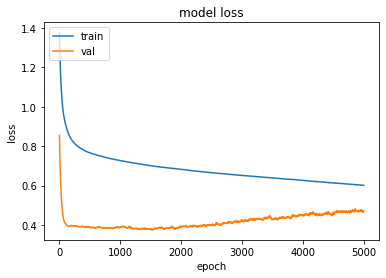

In [144]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

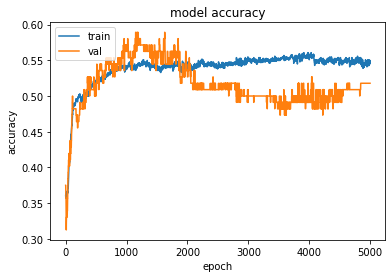

In [145]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Using 1 hidden layer of 11 neurons </span>

In [146]:
l1_norm = 1e-4

model4 = Sequential()
model4.add(Dense(13, activation='relu', activity_regularizer=l1(l1_norm)))
model4.add(Dense(11, activation='relu', activity_regularizer=l1(l1_norm)))
model4.add(Dense(3, activation='linear'))

In [147]:
# set learning rate

lr = 1e-4
model4.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history4 = model4.fit(X_train3, y_train3,
          batch_size=100, epochs=5000,
          validation_data=(X_test3, y_test3))


Train on 1004 samples, validate on 112 samples
Epoch 1/5000
1004/1004 [==============================] - 1s 1ms/sample - loss: 1.6421 - accuracy: 0.2211 - val_loss: 1.0294 - val_accuracy: 0.2411
Epoch 2/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 1.6160 - accuracy: 0.2191 - val_loss: 1.0058 - val_accuracy: 0.2321
Epoch 3/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 1.5918 - accuracy: 0.2211 - val_loss: 0.9836 - val_accuracy: 0.2321
Epoch 4/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 1.5691 - accuracy: 0.2221 - val_loss: 0.9635 - val_accuracy: 0.2321
Epoch 5/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 1.5484 - accuracy: 0.2271 - val_loss: 0.9443 - val_accuracy: 0.2321
Epoch 6/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 1.5284 - accuracy: 0.2291 - val_loss: 0.9258 - val_accuracy: 0.2321
Epoch 7/5000
1004/1004 [==============================] - 0s

1004/1004 [==============================] - 0s 58us/sample - loss: 1.1233 - accuracy: 0.3277 - val_loss: 0.5563 - val_accuracy: 0.3750
Epoch 56/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 1.1197 - accuracy: 0.3317 - val_loss: 0.5535 - val_accuracy: 0.3839
Epoch 57/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 1.1163 - accuracy: 0.3347 - val_loss: 0.5506 - val_accuracy: 0.3929
Epoch 58/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 1.1128 - accuracy: 0.3357 - val_loss: 0.5478 - val_accuracy: 0.4018
Epoch 59/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 1.1095 - accuracy: 0.3347 - val_loss: 0.5450 - val_accuracy: 0.4018
Epoch 60/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 1.1063 - accuracy: 0.3367 - val_loss: 0.5420 - val_accuracy: 0.4107
Epoch 61/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 1.1031 - accuracy: 0.3396 - val_

1004/1004 [==============================] - 0s 48us/sample - loss: 1.0044 - accuracy: 0.4303 - val_loss: 0.4681 - val_accuracy: 0.4732
Epoch 110/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 1.0029 - accuracy: 0.4303 - val_loss: 0.4673 - val_accuracy: 0.4821
Epoch 111/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 1.0015 - accuracy: 0.4343 - val_loss: 0.4665 - val_accuracy: 0.4821
Epoch 112/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.9998 - accuracy: 0.4353 - val_loss: 0.4657 - val_accuracy: 0.4821
Epoch 113/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.9984 - accuracy: 0.4373 - val_loss: 0.4647 - val_accuracy: 0.4821
Epoch 114/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.9970 - accuracy: 0.4382 - val_loss: 0.4637 - val_accuracy: 0.4911
Epoch 115/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.9956 - accuracy: 0.4373 

1004/1004 [==============================] - 0s 81us/sample - loss: 0.9427 - accuracy: 0.4721 - val_loss: 0.4375 - val_accuracy: 0.4643
Epoch 164/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.9419 - accuracy: 0.4741 - val_loss: 0.4371 - val_accuracy: 0.4732
Epoch 165/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.9411 - accuracy: 0.4721 - val_loss: 0.4367 - val_accuracy: 0.4643
Epoch 166/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.9402 - accuracy: 0.4731 - val_loss: 0.4364 - val_accuracy: 0.4643
Epoch 167/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.9393 - accuracy: 0.4741 - val_loss: 0.4360 - val_accuracy: 0.4643
Epoch 168/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.9385 - accuracy: 0.4741 - val_loss: 0.4357 - val_accuracy: 0.4643
Epoch 169/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.9374 - accuracy: 0.4741 

1004/1004 [==============================] - 0s 85us/sample - loss: 0.9007 - accuracy: 0.4771 - val_loss: 0.4205 - val_accuracy: 0.4464
Epoch 218/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.9000 - accuracy: 0.4761 - val_loss: 0.4201 - val_accuracy: 0.4464
Epoch 219/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.8993 - accuracy: 0.4771 - val_loss: 0.4197 - val_accuracy: 0.4464
Epoch 220/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8987 - accuracy: 0.4781 - val_loss: 0.4193 - val_accuracy: 0.4464
Epoch 221/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8980 - accuracy: 0.4771 - val_loss: 0.4190 - val_accuracy: 0.4554
Epoch 222/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8974 - accuracy: 0.4771 - val_loss: 0.4187 - val_accuracy: 0.4554
Epoch 223/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8967 - accuracy: 0.4771 

1004/1004 [==============================] - 0s 61us/sample - loss: 0.8648 - accuracy: 0.4900 - val_loss: 0.4084 - val_accuracy: 0.4554
Epoch 272/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.8641 - accuracy: 0.4910 - val_loss: 0.4079 - val_accuracy: 0.4554
Epoch 273/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.8635 - accuracy: 0.4920 - val_loss: 0.4077 - val_accuracy: 0.4554
Epoch 274/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.8628 - accuracy: 0.4910 - val_loss: 0.4077 - val_accuracy: 0.4554
Epoch 275/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.8621 - accuracy: 0.4910 - val_loss: 0.4074 - val_accuracy: 0.4554
Epoch 276/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.8613 - accuracy: 0.4920 - val_loss: 0.4073 - val_accuracy: 0.4554
Epoch 277/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.8607 - accuracy: 0.4920 

1004/1004 [==============================] - 0s 56us/sample - loss: 0.8344 - accuracy: 0.4940 - val_loss: 0.3970 - val_accuracy: 0.4554
Epoch 326/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.8338 - accuracy: 0.4940 - val_loss: 0.3969 - val_accuracy: 0.4554
Epoch 327/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.8335 - accuracy: 0.4930 - val_loss: 0.3965 - val_accuracy: 0.4643
Epoch 328/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.8330 - accuracy: 0.4940 - val_loss: 0.3964 - val_accuracy: 0.4554
Epoch 329/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.8326 - accuracy: 0.4950 - val_loss: 0.3961 - val_accuracy: 0.4464
Epoch 330/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.8321 - accuracy: 0.4960 - val_loss: 0.3956 - val_accuracy: 0.4464
Epoch 331/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.8317 - accuracy: 0.4950 

1004/1004 [==============================] - 0s 53us/sample - loss: 0.8121 - accuracy: 0.5000 - val_loss: 0.3915 - val_accuracy: 0.4107
Epoch 380/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.8118 - accuracy: 0.5040 - val_loss: 0.3914 - val_accuracy: 0.4107
Epoch 381/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8115 - accuracy: 0.5040 - val_loss: 0.3913 - val_accuracy: 0.4107
Epoch 382/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8111 - accuracy: 0.5020 - val_loss: 0.3911 - val_accuracy: 0.4107
Epoch 383/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8108 - accuracy: 0.5020 - val_loss: 0.3909 - val_accuracy: 0.4107
Epoch 384/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.8105 - accuracy: 0.5020 - val_loss: 0.3907 - val_accuracy: 0.4107
Epoch 385/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8102 - accuracy: 0.5020 

1004/1004 [==============================] - 0s 68us/sample - loss: 0.7963 - accuracy: 0.4990 - val_loss: 0.3885 - val_accuracy: 0.4286
Epoch 434/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7961 - accuracy: 0.5000 - val_loss: 0.3884 - val_accuracy: 0.4286
Epoch 435/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7958 - accuracy: 0.5010 - val_loss: 0.3884 - val_accuracy: 0.4286
Epoch 436/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7955 - accuracy: 0.5030 - val_loss: 0.3885 - val_accuracy: 0.4286
Epoch 437/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7953 - accuracy: 0.5040 - val_loss: 0.3885 - val_accuracy: 0.4286
Epoch 438/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7951 - accuracy: 0.5050 - val_loss: 0.3883 - val_accuracy: 0.4286
Epoch 439/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7949 - accuracy: 0.5040 

1004/1004 [==============================] - 0s 66us/sample - loss: 0.7850 - accuracy: 0.4970 - val_loss: 0.3818 - val_accuracy: 0.4375
Epoch 488/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7847 - accuracy: 0.4960 - val_loss: 0.3818 - val_accuracy: 0.4375
Epoch 489/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7845 - accuracy: 0.4960 - val_loss: 0.3819 - val_accuracy: 0.4375
Epoch 490/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7843 - accuracy: 0.4950 - val_loss: 0.3819 - val_accuracy: 0.4375
Epoch 491/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7841 - accuracy: 0.4940 - val_loss: 0.3815 - val_accuracy: 0.4375
Epoch 492/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7839 - accuracy: 0.4950 - val_loss: 0.3813 - val_accuracy: 0.4375
Epoch 493/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7837 - accuracy: 0.4930 

1004/1004 [==============================] - 0s 57us/sample - loss: 0.7754 - accuracy: 0.4980 - val_loss: 0.3785 - val_accuracy: 0.4286
Epoch 542/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7753 - accuracy: 0.4970 - val_loss: 0.3779 - val_accuracy: 0.4286
Epoch 543/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7751 - accuracy: 0.4970 - val_loss: 0.3783 - val_accuracy: 0.4286
Epoch 544/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7750 - accuracy: 0.4960 - val_loss: 0.3789 - val_accuracy: 0.4375
Epoch 545/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7748 - accuracy: 0.4950 - val_loss: 0.3790 - val_accuracy: 0.4286
Epoch 546/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7746 - accuracy: 0.4960 - val_loss: 0.3791 - val_accuracy: 0.4375
Epoch 547/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7745 - accuracy: 0.4950 

1004/1004 [==============================] - 0s 61us/sample - loss: 0.7674 - accuracy: 0.4960 - val_loss: 0.3736 - val_accuracy: 0.4018
Epoch 596/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7672 - accuracy: 0.4950 - val_loss: 0.3736 - val_accuracy: 0.4018
Epoch 597/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7671 - accuracy: 0.4960 - val_loss: 0.3739 - val_accuracy: 0.4018
Epoch 598/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7669 - accuracy: 0.4950 - val_loss: 0.3738 - val_accuracy: 0.4018
Epoch 599/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7668 - accuracy: 0.4960 - val_loss: 0.3739 - val_accuracy: 0.4018
Epoch 600/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7667 - accuracy: 0.4950 - val_loss: 0.3737 - val_accuracy: 0.4107
Epoch 601/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7666 - accuracy: 0.4950 

1004/1004 [==============================] - 0s 67us/sample - loss: 0.7607 - accuracy: 0.5020 - val_loss: 0.3755 - val_accuracy: 0.4286
Epoch 650/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7605 - accuracy: 0.5030 - val_loss: 0.3753 - val_accuracy: 0.4286
Epoch 651/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7604 - accuracy: 0.5030 - val_loss: 0.3750 - val_accuracy: 0.4286
Epoch 652/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7602 - accuracy: 0.5030 - val_loss: 0.3740 - val_accuracy: 0.4286
Epoch 653/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7601 - accuracy: 0.5050 - val_loss: 0.3735 - val_accuracy: 0.4286
Epoch 654/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7600 - accuracy: 0.5080 - val_loss: 0.3732 - val_accuracy: 0.4286
Epoch 655/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7598 - accuracy: 0.5070 

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7547 - accuracy: 0.5070 - val_loss: 0.3661 - val_accuracy: 0.4286
Epoch 704/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7547 - accuracy: 0.5090 - val_loss: 0.3660 - val_accuracy: 0.4286
Epoch 705/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7546 - accuracy: 0.5110 - val_loss: 0.3659 - val_accuracy: 0.4286
Epoch 706/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.7544 - accuracy: 0.5110 - val_loss: 0.3659 - val_accuracy: 0.4286
Epoch 707/5000
1004/1004 [==============================] - 0s 107us/sample - loss: 0.7543 - accuracy: 0.5100 - val_loss: 0.3659 - val_accuracy: 0.4286
Epoch 708/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.7542 - accuracy: 0.5080 - val_loss: 0.3657 - val_accuracy: 0.4286
Epoch 709/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7541 - accuracy: 0.5070

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7490 - accuracy: 0.5090 - val_loss: 0.3660 - val_accuracy: 0.4643
Epoch 758/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7489 - accuracy: 0.5060 - val_loss: 0.3658 - val_accuracy: 0.4732
Epoch 759/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7488 - accuracy: 0.5040 - val_loss: 0.3657 - val_accuracy: 0.4732
Epoch 760/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7487 - accuracy: 0.5050 - val_loss: 0.3650 - val_accuracy: 0.4732
Epoch 761/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7486 - accuracy: 0.5050 - val_loss: 0.3652 - val_accuracy: 0.4732
Epoch 762/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7485 - accuracy: 0.5030 - val_loss: 0.3651 - val_accuracy: 0.4643
Epoch 763/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7484 - accuracy: 0.5050 

1004/1004 [==============================] - 0s 52us/sample - loss: 0.7440 - accuracy: 0.5110 - val_loss: 0.3630 - val_accuracy: 0.4732
Epoch 812/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7439 - accuracy: 0.5110 - val_loss: 0.3619 - val_accuracy: 0.4643
Epoch 813/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7437 - accuracy: 0.5120 - val_loss: 0.3617 - val_accuracy: 0.4732
Epoch 814/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7437 - accuracy: 0.5129 - val_loss: 0.3615 - val_accuracy: 0.4732
Epoch 815/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7436 - accuracy: 0.5129 - val_loss: 0.3613 - val_accuracy: 0.4821
Epoch 816/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7435 - accuracy: 0.5149 - val_loss: 0.3610 - val_accuracy: 0.4821
Epoch 817/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7434 - accuracy: 0.5169 

1004/1004 [==============================] - 0s 44us/sample - loss: 0.7389 - accuracy: 0.5050 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 866/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7388 - accuracy: 0.5060 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 867/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7387 - accuracy: 0.5060 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 868/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7386 - accuracy: 0.5050 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 869/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7385 - accuracy: 0.5060 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 870/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7384 - accuracy: 0.5070 - val_loss: 0.3590 - val_accuracy: 0.5000
Epoch 871/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7383 - accuracy: 0.5120 

1004/1004 [==============================] - 0s 75us/sample - loss: 0.7340 - accuracy: 0.5149 - val_loss: 0.3542 - val_accuracy: 0.5000
Epoch 920/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7340 - accuracy: 0.5149 - val_loss: 0.3540 - val_accuracy: 0.5000
Epoch 921/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7339 - accuracy: 0.5149 - val_loss: 0.3539 - val_accuracy: 0.5000
Epoch 922/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7338 - accuracy: 0.5139 - val_loss: 0.3538 - val_accuracy: 0.5000
Epoch 923/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7338 - accuracy: 0.5169 - val_loss: 0.3536 - val_accuracy: 0.5000
Epoch 924/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7337 - accuracy: 0.5159 - val_loss: 0.3536 - val_accuracy: 0.5000
Epoch 925/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7336 - accuracy: 0.5159 

1004/1004 [==============================] - 0s 71us/sample - loss: 0.7296 - accuracy: 0.5179 - val_loss: 0.3532 - val_accuracy: 0.5000
Epoch 974/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7294 - accuracy: 0.5189 - val_loss: 0.3534 - val_accuracy: 0.4911
Epoch 975/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7294 - accuracy: 0.5189 - val_loss: 0.3540 - val_accuracy: 0.4911
Epoch 976/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7292 - accuracy: 0.5179 - val_loss: 0.3546 - val_accuracy: 0.4911
Epoch 977/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7290 - accuracy: 0.5169 - val_loss: 0.3546 - val_accuracy: 0.5000
Epoch 978/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7289 - accuracy: 0.5169 - val_loss: 0.3540 - val_accuracy: 0.5000
Epoch 979/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7288 - accuracy: 0.5189 

1004/1004 [==============================] - 0s 43us/sample - loss: 0.7250 - accuracy: 0.5169 - val_loss: 0.3527 - val_accuracy: 0.4732
Epoch 1028/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7248 - accuracy: 0.5159 - val_loss: 0.3539 - val_accuracy: 0.4732
Epoch 1029/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7248 - accuracy: 0.5149 - val_loss: 0.3543 - val_accuracy: 0.4732
Epoch 1030/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7247 - accuracy: 0.5159 - val_loss: 0.3546 - val_accuracy: 0.4643
Epoch 1031/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7246 - accuracy: 0.5149 - val_loss: 0.3548 - val_accuracy: 0.4643
Epoch 1032/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7246 - accuracy: 0.5179 - val_loss: 0.3552 - val_accuracy: 0.4732
Epoch 1033/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7244 - accuracy: 0

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7211 - accuracy: 0.5179 - val_loss: 0.3550 - val_accuracy: 0.4732
Epoch 1082/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7210 - accuracy: 0.5189 - val_loss: 0.3550 - val_accuracy: 0.4732
Epoch 1083/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7209 - accuracy: 0.5189 - val_loss: 0.3551 - val_accuracy: 0.4732
Epoch 1084/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7208 - accuracy: 0.5189 - val_loss: 0.3555 - val_accuracy: 0.4732
Epoch 1085/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7207 - accuracy: 0.5199 - val_loss: 0.3548 - val_accuracy: 0.4732
Epoch 1086/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7207 - accuracy: 0.5199 - val_loss: 0.3546 - val_accuracy: 0.4732
Epoch 1087/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7206 - accuracy: 0

Epoch 1135/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7173 - accuracy: 0.5199 - val_loss: 0.3552 - val_accuracy: 0.4643
Epoch 1136/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7172 - accuracy: 0.5199 - val_loss: 0.3550 - val_accuracy: 0.4643
Epoch 1137/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7172 - accuracy: 0.5199 - val_loss: 0.3546 - val_accuracy: 0.4643
Epoch 1138/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7171 - accuracy: 0.5209 - val_loss: 0.3547 - val_accuracy: 0.4643
Epoch 1139/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7171 - accuracy: 0.5219 - val_loss: 0.3555 - val_accuracy: 0.4554
Epoch 1140/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7169 - accuracy: 0.5209 - val_loss: 0.3556 - val_accuracy: 0.4554
Epoch 1141/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.71

Epoch 1189/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7136 - accuracy: 0.5129 - val_loss: 0.3564 - val_accuracy: 0.4375
Epoch 1190/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7135 - accuracy: 0.5149 - val_loss: 0.3564 - val_accuracy: 0.4375
Epoch 1191/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7135 - accuracy: 0.5159 - val_loss: 0.3565 - val_accuracy: 0.4375
Epoch 1192/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7135 - accuracy: 0.5149 - val_loss: 0.3569 - val_accuracy: 0.4375
Epoch 1193/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7133 - accuracy: 0.5169 - val_loss: 0.3563 - val_accuracy: 0.4375
Epoch 1194/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7132 - accuracy: 0.5169 - val_loss: 0.3560 - val_accuracy: 0.4375
Epoch 1195/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.71

Epoch 1243/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7097 - accuracy: 0.5229 - val_loss: 0.3535 - val_accuracy: 0.4375
Epoch 1244/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7096 - accuracy: 0.5219 - val_loss: 0.3536 - val_accuracy: 0.4375
Epoch 1245/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7095 - accuracy: 0.5219 - val_loss: 0.3538 - val_accuracy: 0.4464
Epoch 1246/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7094 - accuracy: 0.5219 - val_loss: 0.3540 - val_accuracy: 0.4375
Epoch 1247/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7093 - accuracy: 0.5209 - val_loss: 0.3533 - val_accuracy: 0.4375
Epoch 1248/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7093 - accuracy: 0.5209 - val_loss: 0.3530 - val_accuracy: 0.4375
Epoch 1249/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.70

Epoch 1297/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7060 - accuracy: 0.5239 - val_loss: 0.3526 - val_accuracy: 0.4375
Epoch 1298/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7059 - accuracy: 0.5239 - val_loss: 0.3528 - val_accuracy: 0.4464
Epoch 1299/5000
1004/1004 [==============================] - 0s 112us/sample - loss: 0.7059 - accuracy: 0.5239 - val_loss: 0.3527 - val_accuracy: 0.4464
Epoch 1300/5000
1004/1004 [==============================] - 0s 105us/sample - loss: 0.7059 - accuracy: 0.5229 - val_loss: 0.3517 - val_accuracy: 0.4464
Epoch 1301/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7056 - accuracy: 0.5219 - val_loss: 0.3513 - val_accuracy: 0.4464
Epoch 1302/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7056 - accuracy: 0.5219 - val_loss: 0.3510 - val_accuracy: 0.4464
Epoch 1303/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.

Epoch 1351/5000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.7023 - accuracy: 0.5169 - val_loss: 0.3537 - val_accuracy: 0.4375
Epoch 1352/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7023 - accuracy: 0.5169 - val_loss: 0.3533 - val_accuracy: 0.4464
Epoch 1353/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7022 - accuracy: 0.5179 - val_loss: 0.3522 - val_accuracy: 0.4464
Epoch 1354/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7021 - accuracy: 0.5189 - val_loss: 0.3520 - val_accuracy: 0.4554
Epoch 1355/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7020 - accuracy: 0.5189 - val_loss: 0.3517 - val_accuracy: 0.4554
Epoch 1356/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7020 - accuracy: 0.5189 - val_loss: 0.3516 - val_accuracy: 0.4554
Epoch 1357/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.70

1004/1004 [==============================] - 0s 46us/sample - loss: 0.6991 - accuracy: 0.5199 - val_loss: 0.3502 - val_accuracy: 0.4375
Epoch 1405/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6991 - accuracy: 0.5199 - val_loss: 0.3504 - val_accuracy: 0.4375
Epoch 1406/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6990 - accuracy: 0.5209 - val_loss: 0.3503 - val_accuracy: 0.4375
Epoch 1407/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6990 - accuracy: 0.5209 - val_loss: 0.3505 - val_accuracy: 0.4375
Epoch 1408/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6990 - accuracy: 0.5199 - val_loss: 0.3516 - val_accuracy: 0.4375
Epoch 1409/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6989 - accuracy: 0.5199 - val_loss: 0.3521 - val_accuracy: 0.4375
Epoch 1410/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6988 - accuracy: 0

Epoch 1458/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6963 - accuracy: 0.5219 - val_loss: 0.3497 - val_accuracy: 0.4732
Epoch 1459/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6963 - accuracy: 0.5219 - val_loss: 0.3498 - val_accuracy: 0.4732
Epoch 1460/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6962 - accuracy: 0.5219 - val_loss: 0.3498 - val_accuracy: 0.4732
Epoch 1461/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6961 - accuracy: 0.5209 - val_loss: 0.3502 - val_accuracy: 0.4732
Epoch 1462/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6960 - accuracy: 0.5209 - val_loss: 0.3503 - val_accuracy: 0.4732
Epoch 1463/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6959 - accuracy: 0.5209 - val_loss: 0.3504 - val_accuracy: 0.4732
Epoch 1464/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.69

Epoch 1512/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6934 - accuracy: 0.5299 - val_loss: 0.3521 - val_accuracy: 0.4821
Epoch 1513/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6933 - accuracy: 0.5269 - val_loss: 0.3527 - val_accuracy: 0.4821
Epoch 1514/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6932 - accuracy: 0.5269 - val_loss: 0.3527 - val_accuracy: 0.4821
Epoch 1515/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6931 - accuracy: 0.5279 - val_loss: 0.3524 - val_accuracy: 0.4821
Epoch 1516/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6931 - accuracy: 0.5279 - val_loss: 0.3516 - val_accuracy: 0.4821
Epoch 1517/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6929 - accuracy: 0.5279 - val_loss: 0.3513 - val_accuracy: 0.4821
Epoch 1518/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.69

1004/1004 [==============================] - 0s 45us/sample - loss: 0.6903 - accuracy: 0.5289 - val_loss: 0.3497 - val_accuracy: 0.5000
Epoch 1566/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6903 - accuracy: 0.5299 - val_loss: 0.3500 - val_accuracy: 0.5000
Epoch 1567/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6902 - accuracy: 0.5289 - val_loss: 0.3500 - val_accuracy: 0.5000
Epoch 1568/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6901 - accuracy: 0.5309 - val_loss: 0.3499 - val_accuracy: 0.5000
Epoch 1569/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6901 - accuracy: 0.5289 - val_loss: 0.3502 - val_accuracy: 0.5000
Epoch 1570/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6900 - accuracy: 0.5279 - val_loss: 0.3506 - val_accuracy: 0.5000
Epoch 1571/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6899 - accuracy: 0

1004/1004 [==============================] - 0s 49us/sample - loss: 0.6875 - accuracy: 0.5259 - val_loss: 0.3513 - val_accuracy: 0.5000
Epoch 1620/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6874 - accuracy: 0.5259 - val_loss: 0.3509 - val_accuracy: 0.5000
Epoch 1621/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6873 - accuracy: 0.5239 - val_loss: 0.3499 - val_accuracy: 0.5089
Epoch 1622/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6873 - accuracy: 0.5229 - val_loss: 0.3496 - val_accuracy: 0.5179
Epoch 1623/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6873 - accuracy: 0.5249 - val_loss: 0.3497 - val_accuracy: 0.5179
Epoch 1624/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6873 - accuracy: 0.5269 - val_loss: 0.3512 - val_accuracy: 0.5000
Epoch 1625/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6872 - accuracy: 0

1004/1004 [==============================] - 0s 47us/sample - loss: 0.6852 - accuracy: 0.5309 - val_loss: 0.3510 - val_accuracy: 0.5000
Epoch 1674/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6851 - accuracy: 0.5299 - val_loss: 0.3518 - val_accuracy: 0.5000
Epoch 1675/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6850 - accuracy: 0.5289 - val_loss: 0.3527 - val_accuracy: 0.5000
Epoch 1676/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6849 - accuracy: 0.5289 - val_loss: 0.3529 - val_accuracy: 0.5000
Epoch 1677/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6849 - accuracy: 0.5289 - val_loss: 0.3528 - val_accuracy: 0.5000
Epoch 1678/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6848 - accuracy: 0.5299 - val_loss: 0.3528 - val_accuracy: 0.5000
Epoch 1679/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6847 - accuracy: 0

1004/1004 [==============================] - 0s 58us/sample - loss: 0.6825 - accuracy: 0.5309 - val_loss: 0.3522 - val_accuracy: 0.5089
Epoch 1728/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6823 - accuracy: 0.5309 - val_loss: 0.3531 - val_accuracy: 0.5000
Epoch 1729/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6825 - accuracy: 0.5299 - val_loss: 0.3535 - val_accuracy: 0.5000
Epoch 1730/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6824 - accuracy: 0.5299 - val_loss: 0.3536 - val_accuracy: 0.5089
Epoch 1731/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6824 - accuracy: 0.5289 - val_loss: 0.3534 - val_accuracy: 0.5089
Epoch 1732/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6825 - accuracy: 0.5279 - val_loss: 0.3537 - val_accuracy: 0.5089
Epoch 1733/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6823 - accuracy: 0

1004/1004 [==============================] - 0s 54us/sample - loss: 0.6802 - accuracy: 0.5378 - val_loss: 0.3494 - val_accuracy: 0.5179
Epoch 1782/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6802 - accuracy: 0.5398 - val_loss: 0.3488 - val_accuracy: 0.5089
Epoch 1783/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6802 - accuracy: 0.5408 - val_loss: 0.3487 - val_accuracy: 0.5089
Epoch 1784/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6801 - accuracy: 0.5398 - val_loss: 0.3492 - val_accuracy: 0.5089
Epoch 1785/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6801 - accuracy: 0.5388 - val_loss: 0.3494 - val_accuracy: 0.5089
Epoch 1786/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6800 - accuracy: 0.5378 - val_loss: 0.3496 - val_accuracy: 0.5089
Epoch 1787/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6799 - accuracy: 0

1004/1004 [==============================] - 0s 54us/sample - loss: 0.6778 - accuracy: 0.5408 - val_loss: 0.3484 - val_accuracy: 0.5000
Epoch 1836/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6778 - accuracy: 0.5388 - val_loss: 0.3488 - val_accuracy: 0.5000
Epoch 1837/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6777 - accuracy: 0.5398 - val_loss: 0.3492 - val_accuracy: 0.5000
Epoch 1838/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6776 - accuracy: 0.5408 - val_loss: 0.3494 - val_accuracy: 0.5089
Epoch 1839/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6775 - accuracy: 0.5398 - val_loss: 0.3495 - val_accuracy: 0.5089
Epoch 1840/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6775 - accuracy: 0.5398 - val_loss: 0.3497 - val_accuracy: 0.5089
Epoch 1841/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6774 - accuracy: 0

Epoch 1889/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6751 - accuracy: 0.5418 - val_loss: 0.3532 - val_accuracy: 0.5179
Epoch 1890/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6751 - accuracy: 0.5418 - val_loss: 0.3532 - val_accuracy: 0.5179
Epoch 1891/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6750 - accuracy: 0.5418 - val_loss: 0.3529 - val_accuracy: 0.5179
Epoch 1892/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6750 - accuracy: 0.5428 - val_loss: 0.3521 - val_accuracy: 0.5179
Epoch 1893/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6750 - accuracy: 0.5418 - val_loss: 0.3519 - val_accuracy: 0.5179
Epoch 1894/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6748 - accuracy: 0.5408 - val_loss: 0.3514 - val_accuracy: 0.5179
Epoch 1895/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.67

Epoch 1943/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6729 - accuracy: 0.5418 - val_loss: 0.3548 - val_accuracy: 0.5179
Epoch 1944/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.6726 - accuracy: 0.5418 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 1945/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6726 - accuracy: 0.5398 - val_loss: 0.3546 - val_accuracy: 0.5179
Epoch 1946/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6726 - accuracy: 0.5398 - val_loss: 0.3543 - val_accuracy: 0.5179
Epoch 1947/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6725 - accuracy: 0.5398 - val_loss: 0.3545 - val_accuracy: 0.5179
Epoch 1948/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6724 - accuracy: 0.5408 - val_loss: 0.3541 - val_accuracy: 0.5000
Epoch 1949/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6

Epoch 1997/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6705 - accuracy: 0.5478 - val_loss: 0.3512 - val_accuracy: 0.5000
Epoch 1998/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6706 - accuracy: 0.5468 - val_loss: 0.3517 - val_accuracy: 0.5000
Epoch 1999/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6703 - accuracy: 0.5488 - val_loss: 0.3523 - val_accuracy: 0.5000
Epoch 2000/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6703 - accuracy: 0.5478 - val_loss: 0.3533 - val_accuracy: 0.5089
Epoch 2001/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6702 - accuracy: 0.5468 - val_loss: 0.3545 - val_accuracy: 0.5089
Epoch 2002/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.6700 - accuracy: 0.5428 - val_loss: 0.3547 - val_accuracy: 0.5089
Epoch 2003/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.67

Epoch 2051/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6681 - accuracy: 0.5478 - val_loss: 0.3569 - val_accuracy: 0.5179
Epoch 2052/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6680 - accuracy: 0.5478 - val_loss: 0.3563 - val_accuracy: 0.5179
Epoch 2053/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6680 - accuracy: 0.5488 - val_loss: 0.3562 - val_accuracy: 0.5179
Epoch 2054/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6679 - accuracy: 0.5478 - val_loss: 0.3562 - val_accuracy: 0.5179
Epoch 2055/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6679 - accuracy: 0.5478 - val_loss: 0.3566 - val_accuracy: 0.5179
Epoch 2056/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6679 - accuracy: 0.5488 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 2057/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.66

Epoch 2105/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6656 - accuracy: 0.5458 - val_loss: 0.3554 - val_accuracy: 0.5179
Epoch 2106/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6656 - accuracy: 0.5478 - val_loss: 0.3555 - val_accuracy: 0.5179
Epoch 2107/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6655 - accuracy: 0.5478 - val_loss: 0.3557 - val_accuracy: 0.5089
Epoch 2108/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6655 - accuracy: 0.5468 - val_loss: 0.3559 - val_accuracy: 0.5089
Epoch 2109/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6654 - accuracy: 0.5468 - val_loss: 0.3560 - val_accuracy: 0.5089
Epoch 2110/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6654 - accuracy: 0.5468 - val_loss: 0.3557 - val_accuracy: 0.5089
Epoch 2111/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.66

Epoch 2159/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6635 - accuracy: 0.5488 - val_loss: 0.3577 - val_accuracy: 0.5268
Epoch 2160/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6635 - accuracy: 0.5508 - val_loss: 0.3576 - val_accuracy: 0.5268
Epoch 2161/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6634 - accuracy: 0.5488 - val_loss: 0.3574 - val_accuracy: 0.5268
Epoch 2162/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6634 - accuracy: 0.5498 - val_loss: 0.3571 - val_accuracy: 0.5179
Epoch 2163/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6633 - accuracy: 0.5498 - val_loss: 0.3564 - val_accuracy: 0.5179
Epoch 2164/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6632 - accuracy: 0.5508 - val_loss: 0.3561 - val_accuracy: 0.5179
Epoch 2165/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.66

Epoch 2213/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6611 - accuracy: 0.5538 - val_loss: 0.3554 - val_accuracy: 0.5179
Epoch 2214/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6611 - accuracy: 0.5568 - val_loss: 0.3550 - val_accuracy: 0.5179
Epoch 2215/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6612 - accuracy: 0.5578 - val_loss: 0.3557 - val_accuracy: 0.5179
Epoch 2216/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6609 - accuracy: 0.5588 - val_loss: 0.3565 - val_accuracy: 0.5179
Epoch 2217/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6610 - accuracy: 0.5498 - val_loss: 0.3571 - val_accuracy: 0.5179
Epoch 2218/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6609 - accuracy: 0.5488 - val_loss: 0.3570 - val_accuracy: 0.5179
Epoch 2219/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.66

Epoch 2267/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6587 - accuracy: 0.5528 - val_loss: 0.3567 - val_accuracy: 0.5446
Epoch 2268/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6587 - accuracy: 0.5508 - val_loss: 0.3574 - val_accuracy: 0.5446
Epoch 2269/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6588 - accuracy: 0.5518 - val_loss: 0.3569 - val_accuracy: 0.5357
Epoch 2270/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6587 - accuracy: 0.5528 - val_loss: 0.3567 - val_accuracy: 0.5446
Epoch 2271/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6587 - accuracy: 0.5528 - val_loss: 0.3572 - val_accuracy: 0.5446
Epoch 2272/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6586 - accuracy: 0.5518 - val_loss: 0.3575 - val_accuracy: 0.5446
Epoch 2273/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.65

Epoch 2321/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6565 - accuracy: 0.5508 - val_loss: 0.3604 - val_accuracy: 0.5357
Epoch 2322/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6565 - accuracy: 0.5518 - val_loss: 0.3598 - val_accuracy: 0.5357
Epoch 2323/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6563 - accuracy: 0.5528 - val_loss: 0.3597 - val_accuracy: 0.5357
Epoch 2324/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6562 - accuracy: 0.5528 - val_loss: 0.3601 - val_accuracy: 0.5357
Epoch 2325/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6561 - accuracy: 0.5528 - val_loss: 0.3602 - val_accuracy: 0.5357
Epoch 2326/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6561 - accuracy: 0.5528 - val_loss: 0.3604 - val_accuracy: 0.5446
Epoch 2327/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.65

Epoch 2375/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6546 - accuracy: 0.5568 - val_loss: 0.3682 - val_accuracy: 0.5268
Epoch 2376/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6545 - accuracy: 0.5578 - val_loss: 0.3681 - val_accuracy: 0.5268
Epoch 2377/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6545 - accuracy: 0.5578 - val_loss: 0.3673 - val_accuracy: 0.5268
Epoch 2378/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6544 - accuracy: 0.5568 - val_loss: 0.3638 - val_accuracy: 0.5268
Epoch 2379/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6542 - accuracy: 0.5568 - val_loss: 0.3627 - val_accuracy: 0.5357
Epoch 2380/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6541 - accuracy: 0.5558 - val_loss: 0.3622 - val_accuracy: 0.5357
Epoch 2381/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.65

Epoch 2429/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6526 - accuracy: 0.5558 - val_loss: 0.3608 - val_accuracy: 0.5446
Epoch 2430/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6525 - accuracy: 0.5548 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 2431/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6523 - accuracy: 0.5528 - val_loss: 0.3621 - val_accuracy: 0.5446
Epoch 2432/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6523 - accuracy: 0.5548 - val_loss: 0.3629 - val_accuracy: 0.5446
Epoch 2433/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6522 - accuracy: 0.5568 - val_loss: 0.3631 - val_accuracy: 0.5446
Epoch 2434/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.6521 - accuracy: 0.5568 - val_loss: 0.3634 - val_accuracy: 0.5446
Epoch 2435/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.65

Epoch 2483/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6498 - accuracy: 0.5598 - val_loss: 0.3652 - val_accuracy: 0.5357
Epoch 2484/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6498 - accuracy: 0.5608 - val_loss: 0.3653 - val_accuracy: 0.5357
Epoch 2485/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6498 - accuracy: 0.5627 - val_loss: 0.3648 - val_accuracy: 0.5357
Epoch 2486/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6496 - accuracy: 0.5618 - val_loss: 0.3636 - val_accuracy: 0.5357
Epoch 2487/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6495 - accuracy: 0.5618 - val_loss: 0.3633 - val_accuracy: 0.5357
Epoch 2488/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6495 - accuracy: 0.5627 - val_loss: 0.3632 - val_accuracy: 0.5357
Epoch 2489/5000
1004/1004 [==============================] - 0s 119us/sample - loss: 0.6

Epoch 2537/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6475 - accuracy: 0.5657 - val_loss: 0.3655 - val_accuracy: 0.5268
Epoch 2538/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6474 - accuracy: 0.5697 - val_loss: 0.3639 - val_accuracy: 0.5179
Epoch 2539/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6475 - accuracy: 0.5677 - val_loss: 0.3650 - val_accuracy: 0.5179
Epoch 2540/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6473 - accuracy: 0.5657 - val_loss: 0.3653 - val_accuracy: 0.5179
Epoch 2541/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6473 - accuracy: 0.5647 - val_loss: 0.3660 - val_accuracy: 0.5268
Epoch 2542/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6472 - accuracy: 0.5637 - val_loss: 0.3660 - val_accuracy: 0.5357
Epoch 2543/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.64

Epoch 2591/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6451 - accuracy: 0.5657 - val_loss: 0.3653 - val_accuracy: 0.5268
Epoch 2592/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6450 - accuracy: 0.5657 - val_loss: 0.3654 - val_accuracy: 0.5268
Epoch 2593/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6451 - accuracy: 0.5667 - val_loss: 0.3652 - val_accuracy: 0.5179
Epoch 2594/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6450 - accuracy: 0.5677 - val_loss: 0.3652 - val_accuracy: 0.5268
Epoch 2595/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6449 - accuracy: 0.5647 - val_loss: 0.3660 - val_accuracy: 0.5268
Epoch 2596/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6449 - accuracy: 0.5657 - val_loss: 0.3661 - val_accuracy: 0.5179
Epoch 2597/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.64

Epoch 2645/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6428 - accuracy: 0.5627 - val_loss: 0.3659 - val_accuracy: 0.5179
Epoch 2646/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6428 - accuracy: 0.5657 - val_loss: 0.3659 - val_accuracy: 0.5268
Epoch 2647/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6427 - accuracy: 0.5667 - val_loss: 0.3664 - val_accuracy: 0.5268
Epoch 2648/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6427 - accuracy: 0.5667 - val_loss: 0.3659 - val_accuracy: 0.5357
Epoch 2649/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.3609 - accuracy: 0.58 - 0s 46us/sample - loss: 0.6427 - accuracy: 0.5657 - val_loss: 0.3658 - val_accuracy: 0.5357
Epoch 2650/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6427 - accuracy: 0.5657 - val_loss: 0.3660 - val_accuracy: 0.5268
Epoch 2651/5000
1004/1004 [===================

1004/1004 [==============================] - 0s 76us/sample - loss: 0.6408 - accuracy: 0.5717 - val_loss: 0.3675 - val_accuracy: 0.5268
Epoch 2699/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6407 - accuracy: 0.5737 - val_loss: 0.3675 - val_accuracy: 0.5268
Epoch 2700/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6406 - accuracy: 0.5727 - val_loss: 0.3673 - val_accuracy: 0.5357
Epoch 2701/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.6406 - accuracy: 0.5717 - val_loss: 0.3676 - val_accuracy: 0.5357
Epoch 2702/5000
1004/1004 [==============================] - 0s 108us/sample - loss: 0.6406 - accuracy: 0.5727 - val_loss: 0.3675 - val_accuracy: 0.5357
Epoch 2703/5000
1004/1004 [==============================] - 0s 104us/sample - loss: 0.6405 - accuracy: 0.5727 - val_loss: 0.3678 - val_accuracy: 0.5357
Epoch 2704/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6404 - accuracy

Epoch 2752/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6386 - accuracy: 0.5757 - val_loss: 0.3684 - val_accuracy: 0.5446
Epoch 2753/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6385 - accuracy: 0.5747 - val_loss: 0.3684 - val_accuracy: 0.5446
Epoch 2754/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.6385 - accuracy: 0.5777 - val_loss: 0.3682 - val_accuracy: 0.5446
Epoch 2755/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.6385 - accuracy: 0.5797 - val_loss: 0.3677 - val_accuracy: 0.5357
Epoch 2756/5000
1004/1004 [==============================] - 0s 107us/sample - loss: 0.6385 - accuracy: 0.5807 - val_loss: 0.3670 - val_accuracy: 0.5357
Epoch 2757/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6385 - accuracy: 0.5797 - val_loss: 0.3654 - val_accuracy: 0.5357
Epoch 2758/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0

Epoch 2806/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6369 - accuracy: 0.5787 - val_loss: 0.3691 - val_accuracy: 0.5357
Epoch 2807/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6366 - accuracy: 0.5787 - val_loss: 0.3709 - val_accuracy: 0.5446
Epoch 2808/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6367 - accuracy: 0.5787 - val_loss: 0.3720 - val_accuracy: 0.5446
Epoch 2809/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6369 - accuracy: 0.5787 - val_loss: 0.3720 - val_accuracy: 0.5446
Epoch 2810/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6368 - accuracy: 0.5777 - val_loss: 0.3721 - val_accuracy: 0.5446
Epoch 2811/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6367 - accuracy: 0.5767 - val_loss: 0.3719 - val_accuracy: 0.5446
Epoch 2812/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.63

Epoch 2860/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6350 - accuracy: 0.5757 - val_loss: 0.3686 - val_accuracy: 0.5357
Epoch 2861/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6349 - accuracy: 0.5787 - val_loss: 0.3682 - val_accuracy: 0.5357
Epoch 2862/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6348 - accuracy: 0.5797 - val_loss: 0.3688 - val_accuracy: 0.5357
Epoch 2863/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6349 - accuracy: 0.5797 - val_loss: 0.3694 - val_accuracy: 0.5357
Epoch 2864/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6348 - accuracy: 0.5767 - val_loss: 0.3698 - val_accuracy: 0.5446
Epoch 2865/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.6349 - accuracy: 0.5777 - val_loss: 0.3690 - val_accuracy: 0.5446
Epoch 2866/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.63

Epoch 2914/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6330 - accuracy: 0.5747 - val_loss: 0.3744 - val_accuracy: 0.5268
Epoch 2915/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6330 - accuracy: 0.5747 - val_loss: 0.3743 - val_accuracy: 0.5268
Epoch 2916/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6332 - accuracy: 0.5727 - val_loss: 0.3754 - val_accuracy: 0.5357
Epoch 2917/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6332 - accuracy: 0.5707 - val_loss: 0.3749 - val_accuracy: 0.5446
Epoch 2918/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6330 - accuracy: 0.5717 - val_loss: 0.3729 - val_accuracy: 0.5446
Epoch 2919/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6329 - accuracy: 0.5727 - val_loss: 0.3725 - val_accuracy: 0.5446
Epoch 2920/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.63

Epoch 2968/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6313 - accuracy: 0.5717 - val_loss: 0.3706 - val_accuracy: 0.5446
Epoch 2969/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6312 - accuracy: 0.5667 - val_loss: 0.3718 - val_accuracy: 0.5446
Epoch 2970/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6311 - accuracy: 0.5657 - val_loss: 0.3705 - val_accuracy: 0.5446
Epoch 2971/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6310 - accuracy: 0.5687 - val_loss: 0.3702 - val_accuracy: 0.5446
Epoch 2972/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6311 - accuracy: 0.5717 - val_loss: 0.3702 - val_accuracy: 0.5446
Epoch 2973/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6311 - accuracy: 0.5707 - val_loss: 0.3707 - val_accuracy: 0.5446
Epoch 2974/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.63

Epoch 3022/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6296 - accuracy: 0.5677 - val_loss: 0.3794 - val_accuracy: 0.5357
Epoch 3023/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6295 - accuracy: 0.5697 - val_loss: 0.3785 - val_accuracy: 0.5357
Epoch 3024/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6295 - accuracy: 0.5717 - val_loss: 0.3784 - val_accuracy: 0.5357
Epoch 3025/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6294 - accuracy: 0.5727 - val_loss: 0.3779 - val_accuracy: 0.5357
Epoch 3026/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6293 - accuracy: 0.5737 - val_loss: 0.3778 - val_accuracy: 0.5357
Epoch 3027/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6293 - accuracy: 0.5717 - val_loss: 0.3780 - val_accuracy: 0.5357
Epoch 3028/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.62

Epoch 3076/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6276 - accuracy: 0.5837 - val_loss: 0.3755 - val_accuracy: 0.5268
Epoch 3077/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6276 - accuracy: 0.5837 - val_loss: 0.3757 - val_accuracy: 0.5268
Epoch 3078/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6275 - accuracy: 0.5827 - val_loss: 0.3765 - val_accuracy: 0.5268
Epoch 3079/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6274 - accuracy: 0.5817 - val_loss: 0.3767 - val_accuracy: 0.5268
Epoch 3080/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6274 - accuracy: 0.5817 - val_loss: 0.3759 - val_accuracy: 0.5268
Epoch 3081/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6274 - accuracy: 0.5827 - val_loss: 0.3756 - val_accuracy: 0.5268
Epoch 3082/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.62

Epoch 3130/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6257 - accuracy: 0.5837 - val_loss: 0.3764 - val_accuracy: 0.5268
Epoch 3131/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6254 - accuracy: 0.5817 - val_loss: 0.3768 - val_accuracy: 0.5268
Epoch 3132/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6255 - accuracy: 0.5817 - val_loss: 0.3774 - val_accuracy: 0.5268
Epoch 3133/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6256 - accuracy: 0.5787 - val_loss: 0.3794 - val_accuracy: 0.5268
Epoch 3134/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6256 - accuracy: 0.5777 - val_loss: 0.3798 - val_accuracy: 0.5268
Epoch 3135/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6257 - accuracy: 0.5797 - val_loss: 0.3816 - val_accuracy: 0.5268
Epoch 3136/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.62

Epoch 3184/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6236 - accuracy: 0.5817 - val_loss: 0.3806 - val_accuracy: 0.5268
Epoch 3185/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6236 - accuracy: 0.5817 - val_loss: 0.3804 - val_accuracy: 0.5268
Epoch 3186/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6236 - accuracy: 0.5827 - val_loss: 0.3802 - val_accuracy: 0.5268
Epoch 3187/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6235 - accuracy: 0.5837 - val_loss: 0.3802 - val_accuracy: 0.5268
Epoch 3188/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6235 - accuracy: 0.5827 - val_loss: 0.3798 - val_accuracy: 0.5268
Epoch 3189/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6236 - accuracy: 0.5827 - val_loss: 0.3779 - val_accuracy: 0.5268
Epoch 3190/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.62

Epoch 3238/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6218 - accuracy: 0.5837 - val_loss: 0.3824 - val_accuracy: 0.5268
Epoch 3239/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6218 - accuracy: 0.5847 - val_loss: 0.3828 - val_accuracy: 0.5268
Epoch 3240/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6218 - accuracy: 0.5847 - val_loss: 0.3825 - val_accuracy: 0.5268
Epoch 3241/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6217 - accuracy: 0.5867 - val_loss: 0.3821 - val_accuracy: 0.5268
Epoch 3242/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6217 - accuracy: 0.5867 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 3243/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6216 - accuracy: 0.5837 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 3244/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.62

Epoch 3292/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6202 - accuracy: 0.5896 - val_loss: 0.3769 - val_accuracy: 0.5268
Epoch 3293/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6201 - accuracy: 0.5886 - val_loss: 0.3769 - val_accuracy: 0.5268
Epoch 3294/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6200 - accuracy: 0.5926 - val_loss: 0.3770 - val_accuracy: 0.5268
Epoch 3295/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6200 - accuracy: 0.5926 - val_loss: 0.3771 - val_accuracy: 0.5268
Epoch 3296/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6199 - accuracy: 0.5926 - val_loss: 0.3778 - val_accuracy: 0.5268
Epoch 3297/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6198 - accuracy: 0.5926 - val_loss: 0.3780 - val_accuracy: 0.5268
Epoch 3298/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.62

Epoch 3346/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6181 - accuracy: 0.5926 - val_loss: 0.3812 - val_accuracy: 0.5357
Epoch 3347/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6181 - accuracy: 0.5926 - val_loss: 0.3814 - val_accuracy: 0.5357
Epoch 3348/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6181 - accuracy: 0.5926 - val_loss: 0.3816 - val_accuracy: 0.5357
Epoch 3349/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6180 - accuracy: 0.5926 - val_loss: 0.3814 - val_accuracy: 0.5357
Epoch 3350/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6180 - accuracy: 0.5946 - val_loss: 0.3813 - val_accuracy: 0.5357
Epoch 3351/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6178 - accuracy: 0.5946 - val_loss: 0.3823 - val_accuracy: 0.5357
Epoch 3352/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.61

Epoch 3400/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6166 - accuracy: 0.5876 - val_loss: 0.3821 - val_accuracy: 0.5089
Epoch 3401/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6167 - accuracy: 0.5867 - val_loss: 0.3829 - val_accuracy: 0.5089
Epoch 3402/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6164 - accuracy: 0.5886 - val_loss: 0.3839 - val_accuracy: 0.5179
Epoch 3403/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6163 - accuracy: 0.5886 - val_loss: 0.3839 - val_accuracy: 0.5179
Epoch 3404/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6163 - accuracy: 0.5886 - val_loss: 0.3832 - val_accuracy: 0.5179
Epoch 3405/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6163 - accuracy: 0.5886 - val_loss: 0.3836 - val_accuracy: 0.5179
Epoch 3406/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.61

Epoch 3454/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6150 - accuracy: 0.5886 - val_loss: 0.3821 - val_accuracy: 0.5179
Epoch 3455/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6149 - accuracy: 0.5886 - val_loss: 0.3828 - val_accuracy: 0.5089
Epoch 3456/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6150 - accuracy: 0.5876 - val_loss: 0.3834 - val_accuracy: 0.5089
Epoch 3457/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6149 - accuracy: 0.5876 - val_loss: 0.3838 - val_accuracy: 0.5089
Epoch 3458/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6148 - accuracy: 0.5886 - val_loss: 0.3834 - val_accuracy: 0.5089
Epoch 3459/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6148 - accuracy: 0.5886 - val_loss: 0.3834 - val_accuracy: 0.5089
Epoch 3460/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.61

Epoch 3508/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6134 - accuracy: 0.5926 - val_loss: 0.3846 - val_accuracy: 0.5179
Epoch 3509/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6133 - accuracy: 0.5926 - val_loss: 0.3855 - val_accuracy: 0.5179
Epoch 3510/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6133 - accuracy: 0.5916 - val_loss: 0.3869 - val_accuracy: 0.5179
Epoch 3511/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6132 - accuracy: 0.5906 - val_loss: 0.3868 - val_accuracy: 0.5179
Epoch 3512/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6131 - accuracy: 0.5896 - val_loss: 0.3871 - val_accuracy: 0.5179
Epoch 3513/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6132 - accuracy: 0.5896 - val_loss: 0.3860 - val_accuracy: 0.5179
Epoch 3514/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.61

Epoch 3562/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6114 - accuracy: 0.5876 - val_loss: 0.3847 - val_accuracy: 0.5000
Epoch 3563/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6113 - accuracy: 0.5876 - val_loss: 0.3852 - val_accuracy: 0.5000
Epoch 3564/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6114 - accuracy: 0.5867 - val_loss: 0.3836 - val_accuracy: 0.5000
Epoch 3565/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6113 - accuracy: 0.5867 - val_loss: 0.3834 - val_accuracy: 0.5000
Epoch 3566/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6112 - accuracy: 0.5857 - val_loss: 0.3836 - val_accuracy: 0.5179
Epoch 3567/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6111 - accuracy: 0.5876 - val_loss: 0.3843 - val_accuracy: 0.5179
Epoch 3568/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.61

Epoch 3616/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6100 - accuracy: 0.5916 - val_loss: 0.3862 - val_accuracy: 0.5089
Epoch 3617/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6099 - accuracy: 0.5926 - val_loss: 0.3859 - val_accuracy: 0.5089
Epoch 3618/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6098 - accuracy: 0.5936 - val_loss: 0.3859 - val_accuracy: 0.5179
Epoch 3619/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6097 - accuracy: 0.5936 - val_loss: 0.3858 - val_accuracy: 0.5179
Epoch 3620/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6097 - accuracy: 0.5936 - val_loss: 0.3853 - val_accuracy: 0.5179
Epoch 3621/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6096 - accuracy: 0.5946 - val_loss: 0.3851 - val_accuracy: 0.5179
Epoch 3622/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.60

Epoch 3670/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6084 - accuracy: 0.5936 - val_loss: 0.3864 - val_accuracy: 0.5000
Epoch 3671/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6082 - accuracy: 0.5916 - val_loss: 0.3852 - val_accuracy: 0.5089
Epoch 3672/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6083 - accuracy: 0.5926 - val_loss: 0.3841 - val_accuracy: 0.5089
Epoch 3673/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6082 - accuracy: 0.5936 - val_loss: 0.3842 - val_accuracy: 0.5089
Epoch 3674/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6081 - accuracy: 0.5936 - val_loss: 0.3843 - val_accuracy: 0.5089
Epoch 3675/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6080 - accuracy: 0.5926 - val_loss: 0.3845 - val_accuracy: 0.5089
Epoch 3676/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.60

Epoch 3724/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6064 - accuracy: 0.5936 - val_loss: 0.3856 - val_accuracy: 0.5089
Epoch 3725/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6064 - accuracy: 0.5946 - val_loss: 0.3848 - val_accuracy: 0.5089
Epoch 3726/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6066 - accuracy: 0.5946 - val_loss: 0.3846 - val_accuracy: 0.5089
Epoch 3727/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6065 - accuracy: 0.5966 - val_loss: 0.3857 - val_accuracy: 0.5089
Epoch 3728/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6062 - accuracy: 0.5956 - val_loss: 0.3864 - val_accuracy: 0.5179
Epoch 3729/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6062 - accuracy: 0.5956 - val_loss: 0.3869 - val_accuracy: 0.5179
Epoch 3730/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.60

Epoch 3778/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6045 - accuracy: 0.5956 - val_loss: 0.3919 - val_accuracy: 0.5000
Epoch 3779/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6044 - accuracy: 0.5956 - val_loss: 0.3916 - val_accuracy: 0.5089
Epoch 3780/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6045 - accuracy: 0.5956 - val_loss: 0.3919 - val_accuracy: 0.5000
Epoch 3781/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6044 - accuracy: 0.5946 - val_loss: 0.3922 - val_accuracy: 0.5089
Epoch 3782/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6043 - accuracy: 0.5966 - val_loss: 0.3924 - val_accuracy: 0.5089
Epoch 3783/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6043 - accuracy: 0.5966 - val_loss: 0.3922 - val_accuracy: 0.5089
Epoch 3784/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.60

Epoch 3832/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6029 - accuracy: 0.5936 - val_loss: 0.3945 - val_accuracy: 0.5089
Epoch 3833/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6029 - accuracy: 0.5936 - val_loss: 0.3948 - val_accuracy: 0.5000
Epoch 3834/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6028 - accuracy: 0.5926 - val_loss: 0.3943 - val_accuracy: 0.5089
Epoch 3835/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6028 - accuracy: 0.5916 - val_loss: 0.3941 - val_accuracy: 0.5089
Epoch 3836/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6028 - accuracy: 0.5926 - val_loss: 0.3943 - val_accuracy: 0.5000
Epoch 3837/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6026 - accuracy: 0.5916 - val_loss: 0.3955 - val_accuracy: 0.5000
Epoch 3838/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.60

Epoch 3886/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6014 - accuracy: 0.5956 - val_loss: 0.3982 - val_accuracy: 0.5089
Epoch 3887/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6013 - accuracy: 0.5966 - val_loss: 0.3971 - val_accuracy: 0.5089
Epoch 3888/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6013 - accuracy: 0.5956 - val_loss: 0.3968 - val_accuracy: 0.5089
Epoch 3889/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6012 - accuracy: 0.5966 - val_loss: 0.3970 - val_accuracy: 0.5089
Epoch 3890/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6011 - accuracy: 0.5966 - val_loss: 0.3972 - val_accuracy: 0.5089
Epoch 3891/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6015 - accuracy: 0.5936 - val_loss: 0.3968 - val_accuracy: 0.5089
Epoch 3892/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.60

Epoch 3940/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.5996 - accuracy: 0.5936 - val_loss: 0.3999 - val_accuracy: 0.5089
Epoch 3941/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5997 - accuracy: 0.5956 - val_loss: 0.4000 - val_accuracy: 0.5089
Epoch 3942/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5996 - accuracy: 0.5956 - val_loss: 0.3996 - val_accuracy: 0.5089
Epoch 3943/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5996 - accuracy: 0.5936 - val_loss: 0.4004 - val_accuracy: 0.5089
Epoch 3944/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5996 - accuracy: 0.5936 - val_loss: 0.4001 - val_accuracy: 0.5089
Epoch 3945/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5995 - accuracy: 0.5966 - val_loss: 0.3986 - val_accuracy: 0.5089
Epoch 3946/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.59

Epoch 3994/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5983 - accuracy: 0.5946 - val_loss: 0.3925 - val_accuracy: 0.4821
Epoch 3995/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.5983 - accuracy: 0.5946 - val_loss: 0.3929 - val_accuracy: 0.4821
Epoch 3996/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.5982 - accuracy: 0.5916 - val_loss: 0.3931 - val_accuracy: 0.4732
Epoch 3997/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.5981 - accuracy: 0.5916 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 3998/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5981 - accuracy: 0.5916 - val_loss: 0.3929 - val_accuracy: 0.4821
Epoch 3999/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5983 - accuracy: 0.5926 - val_loss: 0.3908 - val_accuracy: 0.4732
Epoch 4000/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.59

Epoch 4048/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5964 - accuracy: 0.5906 - val_loss: 0.4032 - val_accuracy: 0.4732
Epoch 4049/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5964 - accuracy: 0.5906 - val_loss: 0.4026 - val_accuracy: 0.4732
Epoch 4050/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.5963 - accuracy: 0.5896 - val_loss: 0.4023 - val_accuracy: 0.4732
Epoch 4051/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5962 - accuracy: 0.5896 - val_loss: 0.4022 - val_accuracy: 0.4732
Epoch 4052/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5961 - accuracy: 0.5896 - val_loss: 0.4019 - val_accuracy: 0.4732
Epoch 4053/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.5961 - accuracy: 0.5906 - val_loss: 0.4009 - val_accuracy: 0.4732
Epoch 4054/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.59

Epoch 4102/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.5948 - accuracy: 0.5936 - val_loss: 0.4017 - val_accuracy: 0.4911
Epoch 4103/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5947 - accuracy: 0.5926 - val_loss: 0.4013 - val_accuracy: 0.4911
Epoch 4104/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5948 - accuracy: 0.5926 - val_loss: 0.4012 - val_accuracy: 0.4821
Epoch 4105/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5945 - accuracy: 0.5926 - val_loss: 0.4016 - val_accuracy: 0.4821
Epoch 4106/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5944 - accuracy: 0.5926 - val_loss: 0.4017 - val_accuracy: 0.4821
Epoch 4107/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5944 - accuracy: 0.5926 - val_loss: 0.4028 - val_accuracy: 0.4821
Epoch 4108/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.59

Epoch 4156/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.5929 - accuracy: 0.5976 - val_loss: 0.4009 - val_accuracy: 0.4911
Epoch 4157/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5928 - accuracy: 0.5976 - val_loss: 0.4008 - val_accuracy: 0.4911
Epoch 4158/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5929 - accuracy: 0.5966 - val_loss: 0.4009 - val_accuracy: 0.4911
Epoch 4159/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5928 - accuracy: 0.5966 - val_loss: 0.4002 - val_accuracy: 0.4911
Epoch 4160/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.5927 - accuracy: 0.5966 - val_loss: 0.4002 - val_accuracy: 0.4911
Epoch 4161/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5927 - accuracy: 0.5966 - val_loss: 0.4004 - val_accuracy: 0.4911
Epoch 4162/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.59

Epoch 4210/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5915 - accuracy: 0.5996 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 4211/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.5914 - accuracy: 0.6006 - val_loss: 0.3986 - val_accuracy: 0.4821
Epoch 4212/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.5913 - accuracy: 0.6006 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 4213/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5914 - accuracy: 0.5986 - val_loss: 0.3983 - val_accuracy: 0.4911
Epoch 4214/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5913 - accuracy: 0.5976 - val_loss: 0.3988 - val_accuracy: 0.4821
Epoch 4215/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5911 - accuracy: 0.5956 - val_loss: 0.4007 - val_accuracy: 0.4821
Epoch 4216/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.59

Epoch 4264/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5901 - accuracy: 0.5926 - val_loss: 0.4032 - val_accuracy: 0.4732
Epoch 4265/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5900 - accuracy: 0.5946 - val_loss: 0.4038 - val_accuracy: 0.4732
Epoch 4266/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5899 - accuracy: 0.5946 - val_loss: 0.4033 - val_accuracy: 0.4732
Epoch 4267/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.5899 - accuracy: 0.5946 - val_loss: 0.4026 - val_accuracy: 0.4732
Epoch 4268/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5897 - accuracy: 0.5936 - val_loss: 0.4014 - val_accuracy: 0.4732
Epoch 4269/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.5897 - accuracy: 0.5926 - val_loss: 0.4004 - val_accuracy: 0.4732
Epoch 4270/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.58

Epoch 4318/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5885 - accuracy: 0.5886 - val_loss: 0.4035 - val_accuracy: 0.4821
Epoch 4319/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.5885 - accuracy: 0.5896 - val_loss: 0.4027 - val_accuracy: 0.4821
Epoch 4320/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5884 - accuracy: 0.5876 - val_loss: 0.4031 - val_accuracy: 0.4821
Epoch 4321/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.5883 - accuracy: 0.5876 - val_loss: 0.4038 - val_accuracy: 0.4821
Epoch 4322/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5882 - accuracy: 0.5876 - val_loss: 0.4028 - val_accuracy: 0.4821
Epoch 4323/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5885 - accuracy: 0.5906 - val_loss: 0.4026 - val_accuracy: 0.4821
Epoch 4324/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.58

Epoch 4372/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5869 - accuracy: 0.5996 - val_loss: 0.4032 - val_accuracy: 0.4821
Epoch 4373/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5870 - accuracy: 0.5996 - val_loss: 0.4031 - val_accuracy: 0.4821
Epoch 4374/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.5869 - accuracy: 0.5976 - val_loss: 0.4037 - val_accuracy: 0.4821
Epoch 4375/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5868 - accuracy: 0.5966 - val_loss: 0.4048 - val_accuracy: 0.4821
Epoch 4376/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5867 - accuracy: 0.5966 - val_loss: 0.4052 - val_accuracy: 0.4821
Epoch 4377/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5866 - accuracy: 0.5946 - val_loss: 0.4054 - val_accuracy: 0.4821
Epoch 4378/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.58

Epoch 4426/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5853 - accuracy: 0.5966 - val_loss: 0.4049 - val_accuracy: 0.4732
Epoch 4427/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.5852 - accuracy: 0.5976 - val_loss: 0.4040 - val_accuracy: 0.4732
Epoch 4428/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5853 - accuracy: 0.5996 - val_loss: 0.4035 - val_accuracy: 0.4732
Epoch 4429/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.5853 - accuracy: 0.5996 - val_loss: 0.4037 - val_accuracy: 0.4732
Epoch 4430/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.5853 - accuracy: 0.5976 - val_loss: 0.4037 - val_accuracy: 0.4732
Epoch 4431/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.5852 - accuracy: 0.5966 - val_loss: 0.4041 - val_accuracy: 0.4732
Epoch 4432/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.58

Epoch 4480/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5839 - accuracy: 0.5976 - val_loss: 0.4060 - val_accuracy: 0.4821
Epoch 4481/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5839 - accuracy: 0.5986 - val_loss: 0.4058 - val_accuracy: 0.4821
Epoch 4482/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5837 - accuracy: 0.5986 - val_loss: 0.4061 - val_accuracy: 0.4821
Epoch 4483/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5836 - accuracy: 0.5986 - val_loss: 0.4063 - val_accuracy: 0.4821
Epoch 4484/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5837 - accuracy: 0.5996 - val_loss: 0.4062 - val_accuracy: 0.4821
Epoch 4485/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.5836 - accuracy: 0.6006 - val_loss: 0.4065 - val_accuracy: 0.4821
Epoch 4486/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.58

Epoch 4534/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5822 - accuracy: 0.5976 - val_loss: 0.4123 - val_accuracy: 0.4821
Epoch 4535/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.5822 - accuracy: 0.5966 - val_loss: 0.4117 - val_accuracy: 0.4821
Epoch 4536/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5821 - accuracy: 0.5976 - val_loss: 0.4113 - val_accuracy: 0.4821
Epoch 4537/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.5821 - accuracy: 0.5986 - val_loss: 0.4110 - val_accuracy: 0.4911
Epoch 4538/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.5820 - accuracy: 0.5996 - val_loss: 0.4103 - val_accuracy: 0.4911
Epoch 4539/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5820 - accuracy: 0.5986 - val_loss: 0.4104 - val_accuracy: 0.4911
Epoch 4540/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.58

Epoch 4588/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.5806 - accuracy: 0.6016 - val_loss: 0.4138 - val_accuracy: 0.4911
Epoch 4589/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5806 - accuracy: 0.6026 - val_loss: 0.4142 - val_accuracy: 0.4911
Epoch 4590/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.5805 - accuracy: 0.6036 - val_loss: 0.4144 - val_accuracy: 0.4911
Epoch 4591/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.5805 - accuracy: 0.5966 - val_loss: 0.4165 - val_accuracy: 0.4911
Epoch 4592/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5817 - accuracy: 0.5926 - val_loss: 0.4171 - val_accuracy: 0.4911
Epoch 4593/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5817 - accuracy: 0.5936 - val_loss: 0.4167 - val_accuracy: 0.4911
Epoch 4594/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.58

Epoch 4642/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5792 - accuracy: 0.6006 - val_loss: 0.4144 - val_accuracy: 0.4911
Epoch 4643/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5790 - accuracy: 0.6036 - val_loss: 0.4150 - val_accuracy: 0.4911
Epoch 4644/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.5795 - accuracy: 0.6026 - val_loss: 0.4160 - val_accuracy: 0.4821
Epoch 4645/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5793 - accuracy: 0.6036 - val_loss: 0.4145 - val_accuracy: 0.4821
Epoch 4646/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.5794 - accuracy: 0.6026 - val_loss: 0.4141 - val_accuracy: 0.4911
Epoch 4647/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.5792 - accuracy: 0.6016 - val_loss: 0.4141 - val_accuracy: 0.5000
Epoch 4648/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.57

Epoch 4696/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5779 - accuracy: 0.6036 - val_loss: 0.4139 - val_accuracy: 0.5000
Epoch 4697/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.5780 - accuracy: 0.6026 - val_loss: 0.4140 - val_accuracy: 0.5000
Epoch 4698/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5779 - accuracy: 0.6026 - val_loss: 0.4146 - val_accuracy: 0.5000
Epoch 4699/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5779 - accuracy: 0.6016 - val_loss: 0.4151 - val_accuracy: 0.5000
Epoch 4700/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.5777 - accuracy: 0.5996 - val_loss: 0.4153 - val_accuracy: 0.5000
Epoch 4701/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.5776 - accuracy: 0.6006 - val_loss: 0.4155 - val_accuracy: 0.5000
Epoch 4702/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.57

Epoch 4750/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.5760 - accuracy: 0.6036 - val_loss: 0.4165 - val_accuracy: 0.5089
Epoch 4751/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.5759 - accuracy: 0.6036 - val_loss: 0.4151 - val_accuracy: 0.5089
Epoch 4752/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.5760 - accuracy: 0.6026 - val_loss: 0.4150 - val_accuracy: 0.5089
Epoch 4753/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.5760 - accuracy: 0.6016 - val_loss: 0.4153 - val_accuracy: 0.5089
Epoch 4754/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5758 - accuracy: 0.6006 - val_loss: 0.4160 - val_accuracy: 0.5089
Epoch 4755/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.5758 - accuracy: 0.6016 - val_loss: 0.4156 - val_accuracy: 0.5089
Epoch 4756/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.57

Epoch 4804/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5744 - accuracy: 0.6016 - val_loss: 0.4227 - val_accuracy: 0.5089
Epoch 4805/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.5744 - accuracy: 0.6026 - val_loss: 0.4224 - val_accuracy: 0.5089
Epoch 4806/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.5744 - accuracy: 0.6016 - val_loss: 0.4241 - val_accuracy: 0.5089
Epoch 4807/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5743 - accuracy: 0.6016 - val_loss: 0.4239 - val_accuracy: 0.5089
Epoch 4808/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.5743 - accuracy: 0.6036 - val_loss: 0.4232 - val_accuracy: 0.5089
Epoch 4809/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.5743 - accuracy: 0.6026 - val_loss: 0.4237 - val_accuracy: 0.5089
Epoch 4810/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.57

Epoch 4858/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.5735 - accuracy: 0.6026 - val_loss: 0.4248 - val_accuracy: 0.5089
Epoch 4859/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5733 - accuracy: 0.6036 - val_loss: 0.4249 - val_accuracy: 0.5089
Epoch 4860/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.5734 - accuracy: 0.6046 - val_loss: 0.4251 - val_accuracy: 0.5089
Epoch 4861/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5732 - accuracy: 0.6036 - val_loss: 0.4233 - val_accuracy: 0.5089
Epoch 4862/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.5731 - accuracy: 0.6036 - val_loss: 0.4231 - val_accuracy: 0.5089
Epoch 4863/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5730 - accuracy: 0.6036 - val_loss: 0.4231 - val_accuracy: 0.5089
Epoch 4864/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.57

Epoch 4912/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.5723 - accuracy: 0.6016 - val_loss: 0.4140 - val_accuracy: 0.5089
Epoch 4913/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5723 - accuracy: 0.6026 - val_loss: 0.4141 - val_accuracy: 0.5089
Epoch 4914/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5722 - accuracy: 0.6026 - val_loss: 0.4146 - val_accuracy: 0.5089
Epoch 4915/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5720 - accuracy: 0.6026 - val_loss: 0.4151 - val_accuracy: 0.5089
Epoch 4916/5000
1004/1004 [==============================] - 0s 114us/sample - loss: 0.5719 - accuracy: 0.6016 - val_loss: 0.4156 - val_accuracy: 0.5089
Epoch 4917/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.5720 - accuracy: 0.6026 - val_loss: 0.4150 - val_accuracy: 0.5089
Epoch 4918/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.5

Epoch 4966/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5700 - accuracy: 0.6046 - val_loss: 0.4262 - val_accuracy: 0.5089
Epoch 4967/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.5699 - accuracy: 0.6046 - val_loss: 0.4261 - val_accuracy: 0.5089
Epoch 4968/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5698 - accuracy: 0.6046 - val_loss: 0.4262 - val_accuracy: 0.5089
Epoch 4969/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.5698 - accuracy: 0.6046 - val_loss: 0.4262 - val_accuracy: 0.5089
Epoch 4970/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.5697 - accuracy: 0.6026 - val_loss: 0.4265 - val_accuracy: 0.5089
Epoch 4971/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5700 - accuracy: 0.6026 - val_loss: 0.4272 - val_accuracy: 0.5089
Epoch 4972/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.56

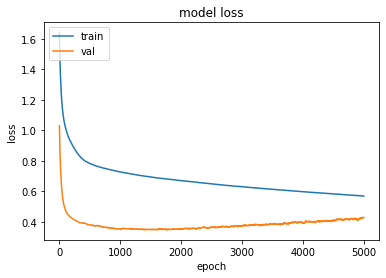

In [148]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

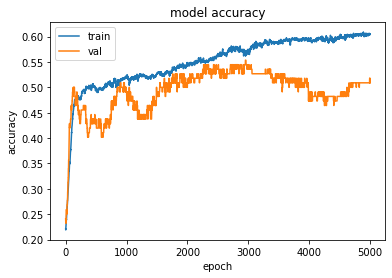

In [149]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Ensemble (Bagging)